In [1]:
%matplotlib inline
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
plt.style.use('ggplot')

#### Load tables

In [2]:
# Names of calculating surface area accessibility
web_based_tools = ['DS', 'StructTools', 'GetArea', 'Mobyle']

# Code to upload .csv files with data
_1IYT_tot_solv_acc = np.loadtxt("Sol Acc - 1IYT TS1.csv",  usecols = (1,2,3,4), delimiter = ",")
_1IYT_conform = np.loadtxt("Sol Acc - 1IYT TS1.csv",  usecols = (0), delimiter = ",", dtype = str)

_1Z0Q_tot_solv_acc = np.loadtxt("Sol Acc - 1Z0Q TS2.csv",  usecols = (1,2,3,4), delimiter = ",")
_1Z0Q_conform = np.loadtxt("Sol Acc - 1Z0Q TS2.csv",  usecols = (0), delimiter = ",", dtype = str)

_1BA4_tot_solv_acc = np.loadtxt("Sol Acc - 1BA4 TS3.csv",  usecols = (1,2,3,4), delimiter = ",")
_1BA4_conform = np.loadtxt("Sol Acc - 1BA4 TS3.csv",  usecols = (0), delimiter = ",", dtype = str)

_2LFM_tot_solv_acc = np.loadtxt("Sol Acc - 2LFM TS4.csv",  usecols = (1,2,3,4), delimiter = ",")
_2LFM_conform = np.loadtxt("Sol Acc - 2LFM TS4.csv",  usecols = (0), delimiter = ",", dtype = str)

In [3]:
# Code to upload .csv files with data for hydrophobic and hydrophilic SAS areas
_1IYT_hydro_SAS = np.loadtxt("Hydro - 1IYT TS5.csv",  usecols = (1,2), delimiter = ",")

_1Z0Q_hydro_SAS = np.loadtxt("Hydro - 1Z0Q TS6.csv",  usecols = (1,2), delimiter = ",")

_1BA4_hydro_SAS = np.loadtxt("Hydro - 1BA4 TS7.csv",  usecols = (1,2), delimiter = ",")

_2LFM_hydro_SAS = np.loadtxt("Hydro - 2LFM TS8.csv",  usecols = (1,2), delimiter = ",")

In [4]:
# Code to upload .csv files with data for t_onset and conformation properties
_1IYT_t_onset_and_prop = np.loadtxt("t_o and prop - 1IYT TS11.csv",  usecols = (1,2,3,4), delimiter = ",")

_1Z0Q_t_onset_and_prop = np.loadtxt("t_o and prop - 1Z0Q TS12.csv",  usecols = (1,2,3,4), delimiter = ",")

_1BA4_t_onset_and_prop = np.loadtxt("t_o and prop - 1BA4 TS13.csv",  usecols = (1,2,3,4), delimiter = ",")

_2LFM_t_onset_and_prop = np.loadtxt("t_o and prop - 2LFM TS14.csv",  usecols = (1,2,3,4), delimiter = ",")

In [5]:
# Code to upload .csv files with data for total AB and conformation properties
_1IYT_tot_AB_and_prop = np.loadtxt("tot AB and prop - 1IYT TS16.csv",  usecols = (1,2,3,4), delimiter = ",")

_1Z0Q_tot_AB_and_prop = np.loadtxt("tot AB and prop - 1Z0Q TS17.csv",  usecols = (1,2,3,4), delimiter = ",")

_1BA4_tot_AB_and_prop = np.loadtxt("tot AB and prop - 1BA4 TS18.csv",  usecols = (1,2,3,4), delimiter = ",")

_2LFM_tot_AB_and_prop = np.loadtxt("tot AB and prop - 2LFM TS19.csv",  usecols = (1,2,3,4), delimiter = ",")

#### Function for aligning data from tables

In [6]:
def rearrange_data(array, first_point, second_point, third_point):
    new_data = []
    for i in range(len(array)):
        new_data.append(array[i])
        
    new_data.append(first_point)
    new_data.append(second_point)
    new_data.append(third_point)
    
    
    return np.asarray(new_data)

#### Create subsets of data

In [7]:
# Create subsets 
_1IYT_hydrophobic_SAS = _1IYT_hydro_SAS[:, 0]
_1Z0Q_hydrophobic_SAS = _1Z0Q_hydro_SAS[:, 0]

_1IYT_t_onset = _1IYT_t_onset_and_prop[:, 0]
_1IYT_hydrophilic_SAS_2 = _1IYT_t_onset_and_prop[:, 3]

_1Z0Q_t_onset = _1Z0Q_t_onset_and_prop[:, 0]
_1Z0Q_hydrophilic_SAS_2 = _1Z0Q_t_onset_and_prop[:, 3]

_1BA4_t_onset = _1BA4_t_onset_and_prop[:, 0]
_1BA4_hydrophilic_SAS_2 = _1BA4_t_onset_and_prop[:, 3]

_2LFM_t_onset = _2LFM_t_onset_and_prop[:, 0]
_2LFM_hydrophilic_SAS_2 = _2LFM_t_onset_and_prop[:, 3]

_1BA4_hydrophobic_SAS = _1BA4_hydro_SAS[:, 0]
_2LFM_hydrophobic_SAS = _2LFM_hydro_SAS[:, 0]

In [8]:
#Create subsets
_1IYT_total_AB = _1IYT_tot_AB_and_prop[:, 0]
_1IYT_hydrophilic_SAS = _1IYT_tot_AB_and_prop[:, 3]

_1Z0Q_total_AB = _1Z0Q_tot_AB_and_prop[:, 0]
_1Z0Q_hydrophilic_SAS = _1Z0Q_tot_AB_and_prop[:, 3]

_1BA4_total_AB = _1BA4_tot_AB_and_prop[:, 0]
_1BA4_hydrophilic_SAS = _1BA4_tot_AB_and_prop[:, 3]

_2LFM_total_AB = _2LFM_tot_AB_and_prop[:, 0]
_2LFM_hydrophilic_SAS = _2LFM_tot_AB_and_prop[:, 3]

#### Define functions we will use throughout project. 

In [9]:
# Linear model will have the form y = ax + b, where beta = [a, b]
from scipy.optimize import leastsq

# Define function to calculate model output
def generate_linear_y(x_GLY, params_GLY):
    y_model_GLY = params_GLY[0] * x_GLY + params_GLY[1]
    
    return y_model_GLY

x_dummy = np.linspace(-100, 100, 201)
guess_params_dummy = [1, 0]
y_dummy = generate_linear_y(x_dummy, guess_params_dummy)
assert(np.all(x_dummy == y_dummy))

# Define residuals function
def residuals_OLS(params_ROLS, x_ROLS, y_ROLS):
    y_model_ROLS = generate_linear_y(x_ROLS, params_ROLS) #params_ROLS = [slope, y-int]
    
    return (y_model_ROLS - y_ROLS)

assert(np.sum(residuals_OLS(guess_params_dummy, x_dummy, y_dummy)) == 0)

# Write function for applying least squares that returns optimal beta
def least_sq(residuals_LS, params_LS, args_LS):
    lSqVals = leastsq(residuals_LS, params_LS, args = args_LS)
    return lSqVals[0]

assert(np.all(least_sq(residuals_OLS, guess_params_dummy, args_LS = (x_dummy, y_dummy)) == guess_params_dummy))

# Define function to return y values of model and beta values
def generate_linear_model(x_GLM, y_GLM, guess_params_GLM, residuals_GLM):
    beta_GLM = least_sq(residuals_GLM, guess_params_GLM, args_LS = (x_GLM, y_GLM))
    y_model_GLM = generate_linear_y(x_GLM, beta_GLM)
    
    return [y_model_GLM, beta_GLM]

assert(np.all(generate_linear_model(x_dummy, y_dummy, guess_params_dummy, residuals_OLS)[0] == y_dummy))

In [10]:
def R2_(modX, obsX):
    sumSqEr =  np.sum(np.square(np.subtract(obsX, modX)))
#     sumSqObs = np.sum(np.square(np.subtract(obsX, np.mean(obsX))))
    sumSqObs = np.sum(np.square(obsX))
    R2_Val = 1 - sumSqEr / sumSqObs
    
    return R2_Val

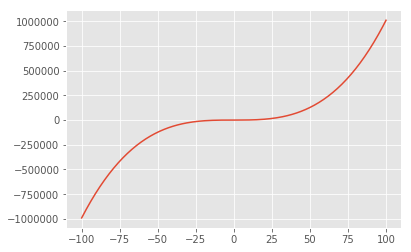

In [11]:
# Create a function for generating a cubic model
def generate_cubic_y(x_GCY, params_GCY):
    y_model_GCY = params_GCY[0] * x_GCY ** 3 + params_GCY[1] * x_GCY ** 2 + params_GCY[2] * x_GCY + params_GCY[3]
    
    return y_model_GCY

guess_params_dummy = [1, 1, 1, 1]
y_dummy = x_dummy ** 3 + x_dummy ** 2 + x_dummy + 1
assert(np.all(generate_cubic_y(x_dummy, guess_params_dummy) == y_dummy))

# Create function for calculating residuals of cubic function
def residuals_CLS(params_RCLS, x_RCLS, y_RCLS):
    y_model_RCLS = generate_cubic_y(x_RCLS, params_RCLS) # params_RCLS = [a, b, c, d]
    
    return (y_model_RCLS - y_RCLS)

assert(np.sum(residuals_CLS(guess_params_dummy, x_dummy, y_dummy)) == 0)

# Define function to return y values of model and beta values
def generate_cubic_model(x_GCB, y_GCB, guess_params_GCB, residuals_GCB):
    beta_GCB = least_sq(residuals_GCB, guess_params_GCB, args_LS = (x_GCB, y_GCB))
    y_model_GCB = generate_cubic_y(x_GCB, beta_GCB)
    
    return [y_model_GCB, beta_GCB]
    
assert(np.all(generate_cubic_model(x_dummy, y_dummy, guess_params_dummy, residuals_CLS)[0] == y_dummy)) 

cubic_model_dummy = generate_cubic_model(x_dummy, y_dummy, guess_params_dummy, residuals_CLS)
plt.plot(x_dummy, cubic_model_dummy[0])
plt.show()

#### --------------------------------
#### Reproducing Figure 2 from Paper
#### ---------------------------------

In [12]:
# Figure 2a
_1IYT_hydrophobic_SAS_subset_1 = _1IYT_hydrophobic_SAS[0:11]
_1IYT_t_onset_subset_1 = _1IYT_t_onset[0:11]

_1IYT_hydrophobic_SAS_E22K = _1IYT_hydrophobic_SAS[10]
_1IYT_t_onset_E22K = _1IYT_t_onset[11]

_1IYT_hydrophobic_SAS_E22Q = _1IYT_hydrophobic_SAS[11]
_1IYT_t_onset_E22Q = _1IYT_t_onset[10]

_1IYT_hydrophobic_SAS_D23N = _1IYT_hydrophobic_SAS[12]
_1IYT_t_onset_D23N = _1IYT_t_onset[12]

#Combine all x and y points
AllHydrophobicSASFig2a = rearrange_data(_1IYT_hydrophobic_SAS_subset_1, _1IYT_hydrophobic_SAS_E22K, _1IYT_hydrophobic_SAS_E22Q, _1IYT_hydrophobic_SAS_D23N)
AllTOnsetFig2a = rearrange_data(_1IYT_t_onset_subset_1, _1IYT_t_onset_E22K, _1IYT_t_onset_E22Q, _1IYT_t_onset_D23N)


# Figure 2b
_1Z0Q_hydrophobic_SAS_subset_1 = _1Z0Q_hydrophobic_SAS[0:10]
_1Z0Q_t_onset_subset_1 = _1Z0Q_t_onset[0:10]

_1Z0Q_hydrophobic_SAS_E22K = _1Z0Q_hydrophobic_SAS[10]
_1Z0Q_t_onset_E22K = _1Z0Q_t_onset[11]

_1Z0Q_hydrophobic_SAS_E22Q = _1Z0Q_hydrophobic_SAS[11]
_1Z0Q_t_onset_E22Q = _1Z0Q_t_onset[10]

_1Z0Q_hydrophobic_SAS_D23N = _1Z0Q_hydrophobic_SAS[12]
_1Z0Q_t_onset_D23N = _1Z0Q_t_onset[12]

#Combine all x and y points
AllHydrophobicSASFig2b = rearrange_data(_1Z0Q_hydrophobic_SAS_subset_1, _1Z0Q_hydrophobic_SAS_E22K, _1Z0Q_hydrophobic_SAS_E22Q, _1Z0Q_hydrophobic_SAS_D23N)
AllTOnsetFig2b = rearrange_data(_1Z0Q_t_onset_subset_1, _1Z0Q_t_onset_E22K, _1Z0Q_t_onset_E22Q, _1Z0Q_t_onset_D23N)


# Figure 2c
_1BA4_hydrophobic_SAS_subset_1 = _1BA4_hydrophobic_SAS[0:10]
_1BA4_t_onset_subset_1 = _1BA4_t_onset[0:10]

_1BA4_hydrophobic_SAS_E22K = _1BA4_hydrophobic_SAS[10]
_1BA4_t_onset_E22K = _1BA4_t_onset[11]

_1BA4_hydrophobic_SAS_E22Q = _1BA4_hydrophobic_SAS[11]
_1BA4_t_onset_E22Q = _1BA4_t_onset[10]

_1BA4_hydrophobic_SAS_D23N = _1BA4_hydrophobic_SAS[12]
_1BA4_t_onset_D23N = _1BA4_t_onset[12]

#Combine all x and y points
AllHydrophobicSASFig2c = rearrange_data(_1BA4_hydrophobic_SAS_subset_1, _1BA4_hydrophobic_SAS_E22K, _1BA4_hydrophobic_SAS_E22Q, _1BA4_hydrophobic_SAS_D23N)
AllTOnsetFig2c = rearrange_data(_1BA4_t_onset_subset_1, _1BA4_t_onset_E22K, _1BA4_t_onset_E22Q, _1BA4_t_onset_D23N)


# Figure 2d
_2LFM_hydrophobic_SAS_subset_1 = _2LFM_hydrophobic_SAS[0:10]
_2LFM_t_onset_subset_1 = _2LFM_t_onset[0:10]

_2LFM_hydrophobic_SAS_E22K = _2LFM_hydrophobic_SAS[10]
_2LFM_t_onset_E22K = _2LFM_t_onset[11]

_2LFM_hydrophobic_SAS_E22Q = _2LFM_hydrophobic_SAS[11]
_2LFM_t_onset_E22Q = _2LFM_t_onset[10]

_2LFM_hydrophobic_SAS_D23N = _2LFM_hydrophobic_SAS[12]
_2LFM_t_onset_D23N = _2LFM_t_onset[12]

#Combine all x and y points
AllHydrophobicSASFig2d = rearrange_data(_2LFM_hydrophobic_SAS_subset_1, _2LFM_hydrophobic_SAS_E22K, _2LFM_hydrophobic_SAS_E22Q, _2LFM_hydrophobic_SAS_D23N)
AllTOnsetFig2d = rearrange_data(_2LFM_t_onset_subset_1, _2LFM_t_onset_E22K, _2LFM_t_onset_E22Q, _2LFM_t_onset_D23N)

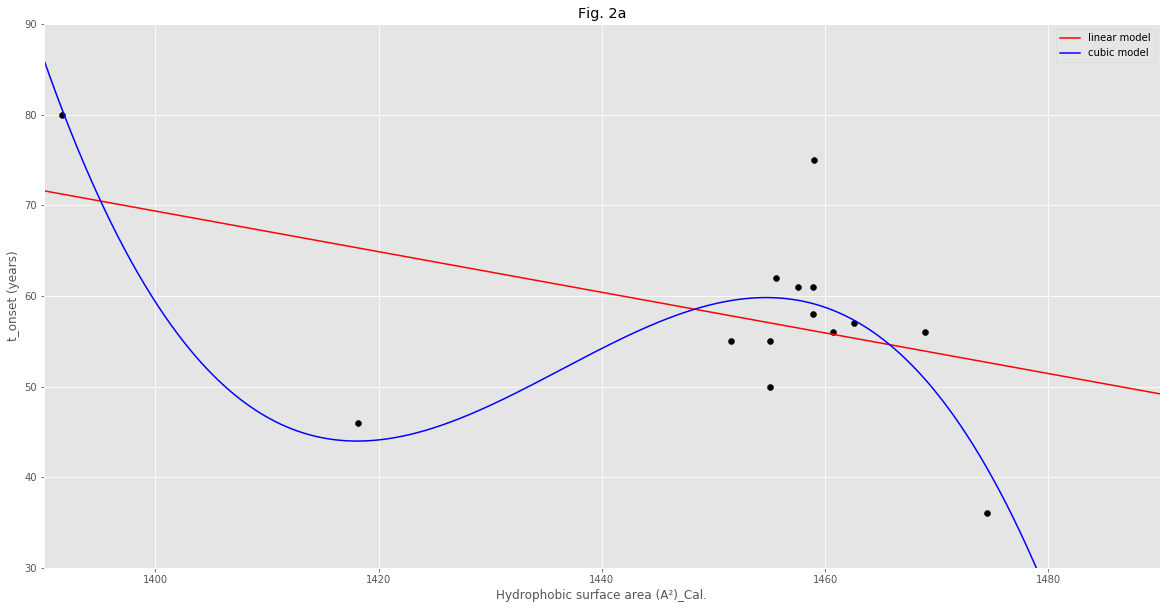

In [62]:
#Figure 2a
x_limits_fig_2a = [1390, 1490]
x_fig_2a = np.linspace(x_limits_fig_2a[0], x_limits_fig_2a[1], 1000)

#Plot data
plt.figure(figsize = (20, 10))
plt.scatter(AllHydrophobicSASFig2a, AllTOnsetFig2a, c = 'k')

# Generate Linear Model
guess_params_linear_fig_2a = [-4, 300]
linear_model_fig_2a = generate_linear_model(AllHydrophobicSASFig2a, AllTOnsetFig2a, guess_params_linear_fig_2a, residuals_OLS)

# Generate cubic model
guess_params_cubic_fig_2a = [-1, 1, 1, 1]
cubic_model_fig_2a = generate_cubic_model(AllHydrophobicSASFig2a, AllTOnsetFig2a, guess_params_cubic_fig_2a, residuals_CLS)       

# Plot Models
plt.plot(x_fig_2a, generate_linear_y(x_fig_2a, linear_model_fig_2a[1]), c = 'r', label = 'linear model')
plt.plot(x_fig_2a, generate_cubic_y(x_fig_2a, cubic_model_fig_2a[1]), c = 'b', label = 'cubic model')

#Set axis limits
axis = plt.gca()
axis.set_xlim(x_limits_fig_2a)
axis.set_ylim([30,90])

#Labels
plt.title('Fig. 2a')
plt.xlabel('Hydrophobic surface area (A²)_Cal.')
plt.ylabel('t_onset (years)')
plt.legend()

plt.show()

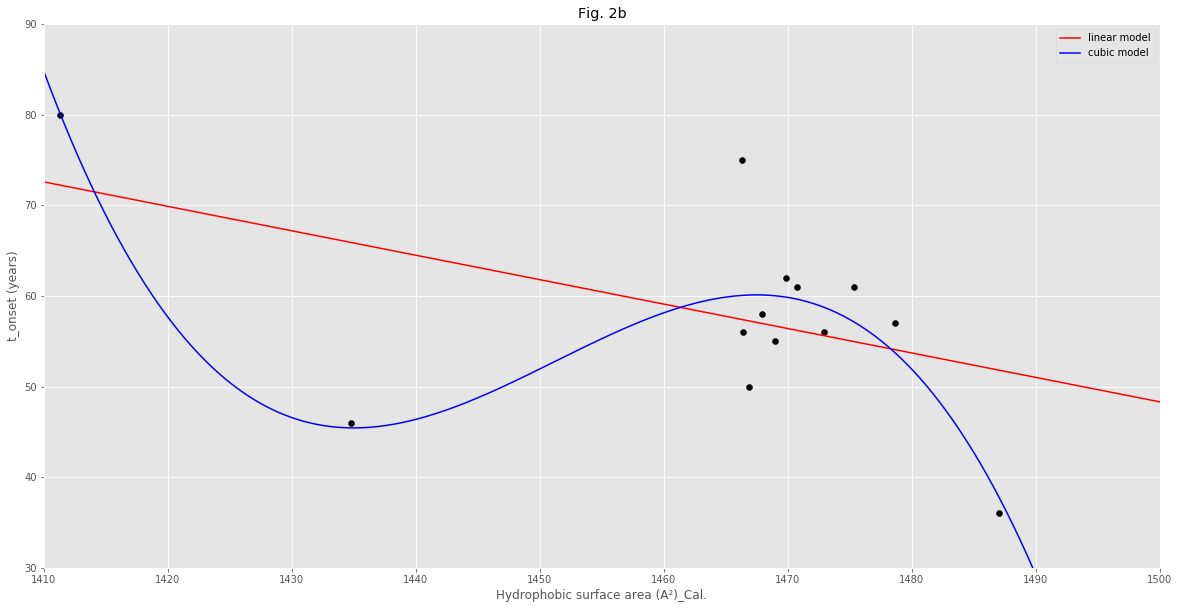

In [63]:
#Figure 2b
x_limits_fig_2b = [1410,1500]
x_fig_2b = np.linspace(x_limits_fig_2b[0], x_limits_fig_2b[1], 1000)

#Plot data
plt.figure(figsize = (20, 10))
plt.scatter(AllHydrophobicSASFig2b, AllTOnsetFig2b, c = 'k')

# Generate Linear Model
guess_params_linear_fig_2b = [-4, 300]
linear_model_fig_2b = generate_linear_model(AllHydrophobicSASFig2b, AllTOnsetFig2b, guess_params_linear_fig_2b, residuals_OLS)

# Generate Cubic Model
guess_params_cubic_fig_2b = [-1, 1, 1, 1]
cubic_model_fig_2b = generate_cubic_model(AllHydrophobicSASFig2b, AllTOnsetFig2b, guess_params_cubic_fig_2b, residuals_CLS)

# Plot Models
plt.plot(x_fig_2b, generate_linear_y(x_fig_2b, linear_model_fig_2b[1]), c = 'r', label = 'linear model')
plt.plot(x_fig_2b, generate_cubic_y(x_fig_2b, cubic_model_fig_2b[1]), c = 'b', label = 'cubic model')

#Set axis limits
axis = plt.gca()
axis.set_xlim(x_limits_fig_2b)
axis.set_ylim([30,90])

#Labels
plt.title('Fig. 2b')
plt.xlabel('Hydrophobic surface area (A²)_Cal.')
plt.ylabel('t_onset (years)')
plt.legend()

plt.show()

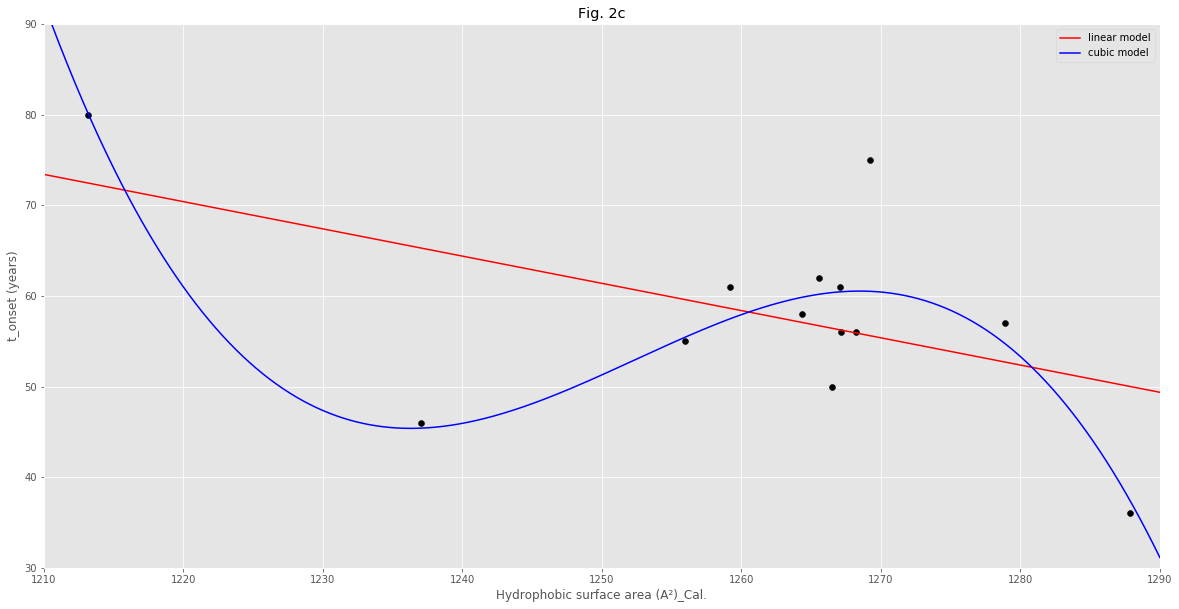

In [64]:
#Figure 2c
x_limits_fig_2c = [1210, 1290]
x_fig_2c = np.linspace(x_limits_fig_2c[0], x_limits_fig_2c[1], 1000)

#Plot data
plt.figure(figsize = (20, 10))
plt.scatter(AllHydrophobicSASFig2c, AllTOnsetFig2c, c = 'k')

# Generate Linear Model
guess_params_linear_fig_2c = [-4, 300]
linear_model_fig_2c = generate_linear_model(AllHydrophobicSASFig2c, AllTOnsetFig2c, guess_params_linear_fig_2c, residuals_OLS)

# Generate Cubic Model
guess_params_cubic_fig_2c = [-1, 1, 1, 1]
cubic_model_fig_2c = generate_cubic_model(AllHydrophobicSASFig2c, AllTOnsetFig2c, guess_params_cubic_fig_2c, residuals_CLS)

# Plot Models
plt.plot(x_fig_2c, generate_linear_y(x_fig_2c, linear_model_fig_2c[1]), c = 'r', label = 'linear model')
plt.plot(x_fig_2c, generate_cubic_y(x_fig_2c, cubic_model_fig_2c[1]), c = 'b', label = 'cubic model')

#Set axis limits
axis = plt.gca()
axis.set_xlim(x_limits_fig_2c)
axis.set_ylim([30,90])

#Labels
plt.title('Fig. 2c')
plt.xlabel('Hydrophobic surface area (A²)_Cal.')
plt.ylabel('t_onset (years)')
plt.legend()

plt.show()

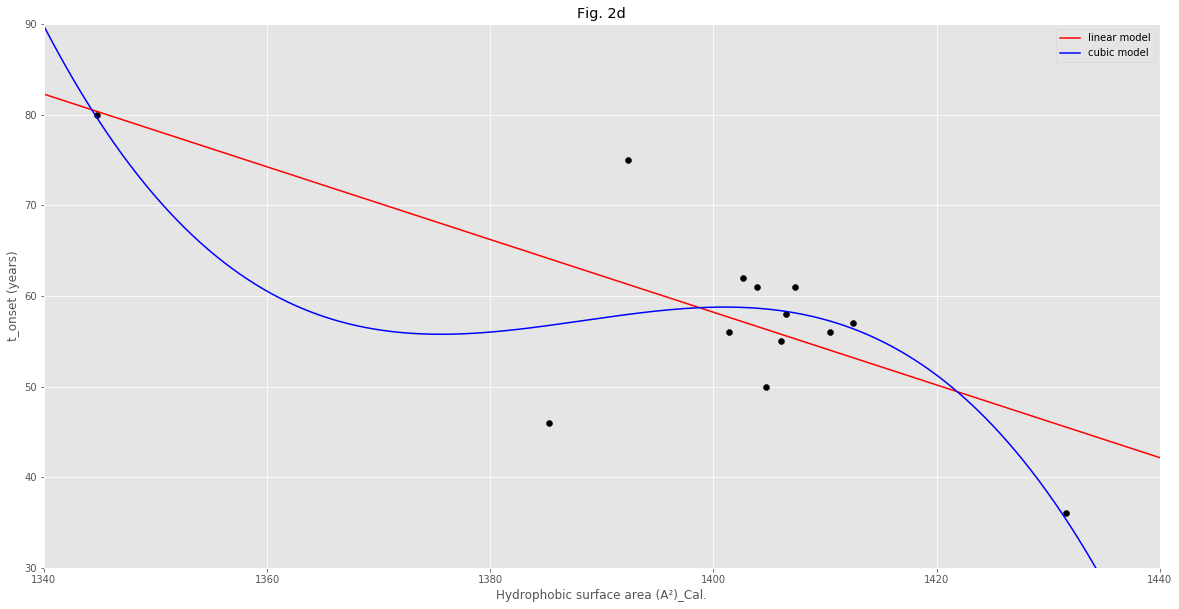

In [65]:
#Figure 2d
x_limits_fig_2d = [1340, 1440]
x_fig_2d = np.linspace(x_limits_fig_2d[0], x_limits_fig_2d[1], 1000)

#Plot data
plt.figure(figsize = (20, 10))
plt.scatter(AllHydrophobicSASFig2d, AllTOnsetFig2d, c = 'k')

# Generate Linear Model
guess_params_linear_fig_2d = [-4, 300]
linear_model_fig_2d = generate_linear_model(AllHydrophobicSASFig2d, AllTOnsetFig2d, guess_params_linear_fig_2d, residuals_OLS)

# Generate Cubic Model
guess_params_cubic_fig_2d = [-1, 1, 1, 1]
cubic_model_fig_2d = generate_cubic_model(AllHydrophobicSASFig2d, AllTOnsetFig2d, guess_params_cubic_fig_2d, residuals_CLS)

# Plot Models
plt.plot(x_fig_2d, generate_linear_y(x_fig_2d, linear_model_fig_2d[1]), c = 'r', label = 'linear model')
plt.plot(x_fig_2d, generate_cubic_y(x_fig_2d, cubic_model_fig_2d[1]), c = 'b', label = 'cubic model')

# Set axis limits
axis = plt.gca()
axis.set_xlim(x_limits_fig_2d)
axis.set_ylim([30,90])

# Labels
plt.title('Fig. 2d')
plt.legend()
plt.xlabel('Hydrophobic surface area (A²)_Cal.')
plt.ylabel('t_onset (years)')

plt.show()

#### -----------------------------
#### Reproducing Figure 3 from Paper
#### ---------------------------

In [66]:
# Rearrange Data

# Figure 3a
_1IYT_total_AB_subset_1 = _1IYT_total_AB[0:10]
_1IYT_hydrophobic_SAS_subset_1 = _1IYT_hydrophobic_SAS[0:10]

_1IYT_total_AB_E22K = _1IYT_total_AB[11]
_1IYT_hydrophobic_SAS_E22K = _1IYT_hydrophobic_SAS[10]

_1IYT_total_AB_E22Q = _1IYT_total_AB[10]
_1IYT_hydrophobic_SAS_E22Q = _1IYT_hydrophobic_SAS[11]

_1IYT_total_AB_D23N = _1IYT_total_AB[12]
_1IYT_hydrophobic_SAS_D23N = _1IYT_hydrophobic_SAS[12]

#Combine all x and y points
AllHydrophobicSASFig3a = rearrange_data(_1IYT_hydrophobic_SAS_subset_1, _1IYT_hydrophobic_SAS_E22K, _1IYT_hydrophobic_SAS_E22Q, _1IYT_hydrophobic_SAS_D23N)
AllTotalABFig3a = rearrange_data(_1IYT_total_AB_subset_1, _1IYT_total_AB_E22K, _1IYT_total_AB_E22Q, _1IYT_total_AB_D23N)

# Figure 3b
_1Z0Q_hydrophobic_SAS_subset_1 = _1Z0Q_hydrophobic_SAS[0:10]
_1Z0Q_total_AB_subset_1 = _1Z0Q_total_AB[0:10]

_1Z0Q_hydrophobic_SAS_E22K = _1Z0Q_hydrophobic_SAS[10]
_1Z0Q_total_AB_E22K = _1Z0Q_total_AB[11]

_1Z0Q_hydrophobic_SAS_E22Q = _1Z0Q_hydrophobic_SAS[11]
_1Z0Q_total_AB_E22Q = _1Z0Q_total_AB[10]

_1Z0Q_hydrophobic_SAS_D23N = _1Z0Q_hydrophobic_SAS[12]
_1Z0Q_total_AB_D23N = _1Z0Q_total_AB[12]

#Combine all x and y points
AllHydrophobicSASFig3b = rearrange_data(_1Z0Q_hydrophobic_SAS_subset_1, _1Z0Q_hydrophobic_SAS_E22K, _1Z0Q_hydrophobic_SAS_E22Q, _1Z0Q_hydrophobic_SAS_D23N)
AllTotalABFig3b = rearrange_data(_1Z0Q_total_AB_subset_1, _1Z0Q_total_AB_E22K, _1Z0Q_total_AB_E22Q, _1Z0Q_total_AB_D23N)

# Figure 3c
_1BA4_hydrophobic_SAS_subset_1 = _1BA4_hydrophobic_SAS[0:10]
_1BA4_total_AB_subset_1 = _1BA4_total_AB[0:10]

_1BA4_hydrophobic_SAS_E22K = _1BA4_hydrophobic_SAS[10]
_1BA4_total_AB_E22K = _1BA4_total_AB[11]

_1BA4_hydrophobic_SAS_E22Q = _1BA4_hydrophobic_SAS[11]
_1BA4_total_AB_E22Q = _1BA4_total_AB[10]

_1BA4_hydrophobic_SAS_D23N = _1BA4_hydrophobic_SAS[12]
_1BA4_total_AB_D23N = _1BA4_total_AB[12]

#Combine all x and y points
AllHydrophobicSASFig3c = rearrange_data(_1BA4_hydrophobic_SAS_subset_1, _1BA4_hydrophobic_SAS_E22K, _1BA4_hydrophobic_SAS_E22Q, _1BA4_hydrophobic_SAS_D23N)
AllTotalABFig3c = rearrange_data(_1BA4_total_AB_subset_1, _1BA4_total_AB_E22K, _1BA4_total_AB_E22Q, _1BA4_total_AB_D23N)

# Figure 3d
_2LFM_hydrophobic_SAS_subset_1 = _2LFM_hydrophobic_SAS[0:10]
_2LFM_total_AB_subset_1 = _2LFM_total_AB[0:10]

_2LFM_hydrophobic_SAS_E22K = _2LFM_hydrophobic_SAS[10]
_2LFM_total_AB_E22K = _2LFM_total_AB[11]

_2LFM_hydrophobic_SAS_E22Q = _2LFM_hydrophobic_SAS[11]
_2LFM_total_AB_E22Q = _2LFM_total_AB[10]

_2LFM_hydrophobic_SAS_D23N = _2LFM_hydrophobic_SAS[12]
_2LFM_total_AB_D23N = _2LFM_total_AB[12]

#Combine all x and y points
AllHydrophobicSASFig3d = rearrange_data(_2LFM_hydrophobic_SAS_subset_1, _2LFM_hydrophobic_SAS_E22K, _2LFM_hydrophobic_SAS_E22Q, _2LFM_hydrophobic_SAS_D23N)
AllTotalABFig3d = rearrange_data(_2LFM_total_AB_subset_1, _2LFM_total_AB_E22K, _2LFM_total_AB_E22Q, _2LFM_total_AB_D23N)



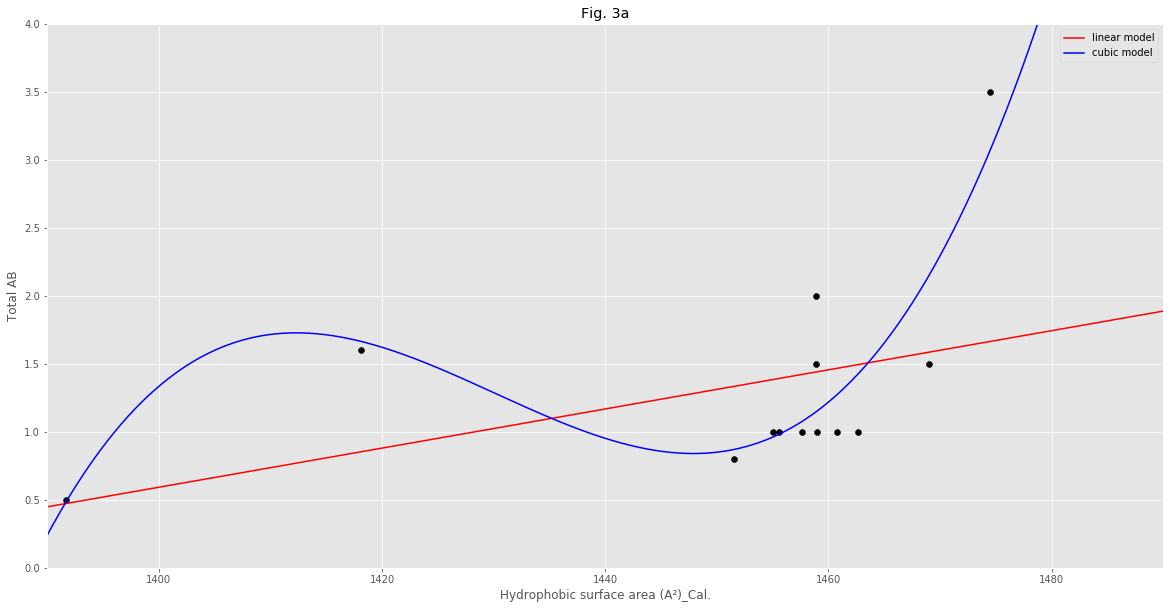

In [67]:
#Figure 3a
x_limits_fig_3a = [1390,1490]
x_fig_3a = np.linspace(x_limits_fig_3a[0], x_limits_fig_3a[1], 1000)

#Plot data
plt.figure(figsize = (20, 10))
plt.scatter(AllHydrophobicSASFig3a, AllTotalABFig3a, c = 'k')

# Generate Linear Model
guess_params_linear_fig_3a = [0.1, -100]
linear_model_fig_3a = generate_linear_model(AllHydrophobicSASFig3a, AllTotalABFig3a, guess_params_linear_fig_3a, residuals_OLS)

# Generate Cubic Model
guess_params_cubic_fig_3a = [1, 1, 1, 1]
cubic_model_fig_3a = generate_cubic_model(AllHydrophobicSASFig3a, AllTotalABFig3a, guess_params_cubic_fig_3a, residuals_CLS)

# Plot Models
plt.plot(x_fig_3a, generate_linear_y(x_fig_3a, linear_model_fig_3a[1]), c = 'r', label = 'linear model')
plt.plot(x_fig_3a, generate_cubic_y(x_fig_3a, cubic_model_fig_3a[1]), c = 'b', label = 'cubic model')

#Set axis limits
axis = plt.gca()
axis.set_xlim(x_limits_fig_3a)
axis.set_ylim([0,4])

#Labels
plt.title('Fig. 3a')
plt.legend()
plt.xlabel('Hydrophobic surface area (A²)_Cal.')
plt.ylabel('Total AB')

plt.show()

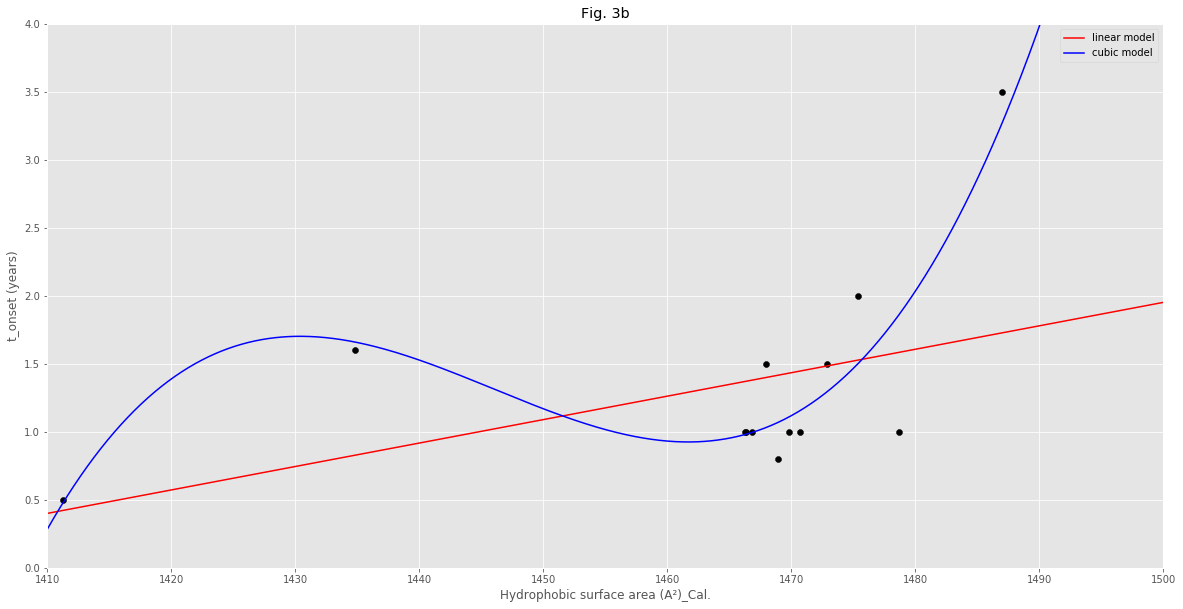

In [68]:
#Figure 3b
x_limits_fig_3b = [1410, 1500]
x_fig_3b = np.linspace(x_limits_fig_3b[0], x_limits_fig_3b[1], 1000)

#Plot data
plt.figure(figsize = (20, 10))
plt.scatter(AllHydrophobicSASFig3b, AllTotalABFig3b, c = 'k')

# Generate Linear Model
guess_params_linear_fig_3b = [0.1, -100]
linear_model_fig_3b = generate_linear_model(AllHydrophobicSASFig3b, AllTotalABFig3b, guess_params_linear_fig_3b, residuals_OLS)

# Generate Cubic Model
guess_params_cubic_fig_3b = [1, 1, 1, 1]
cubic_model_fig_3b = generate_linear_model(AllHydrophobicSASFig3b, AllTotalABFig3b, guess_params_cubic_fig_3b, residuals_CLS)

# Plot Models
plt.plot(x_fig_3b, generate_linear_y(x_fig_3b, linear_model_fig_3b[1]), c = 'r', label = 'linear model')
plt.plot(x_fig_3b, generate_cubic_y(x_fig_3b, cubic_model_fig_3b[1]), c = 'b', label = 'cubic model')

#Set axis limits
axis = plt.gca()
axis.set_xlim(x_limits_fig_3b)
axis.set_ylim([0,4])

#Labels
plt.title('Fig. 3b')
plt.legend()
plt.xlabel('Hydrophobic surface area (A²)_Cal.')
plt.ylabel('t_onset (years)')

plt.show()

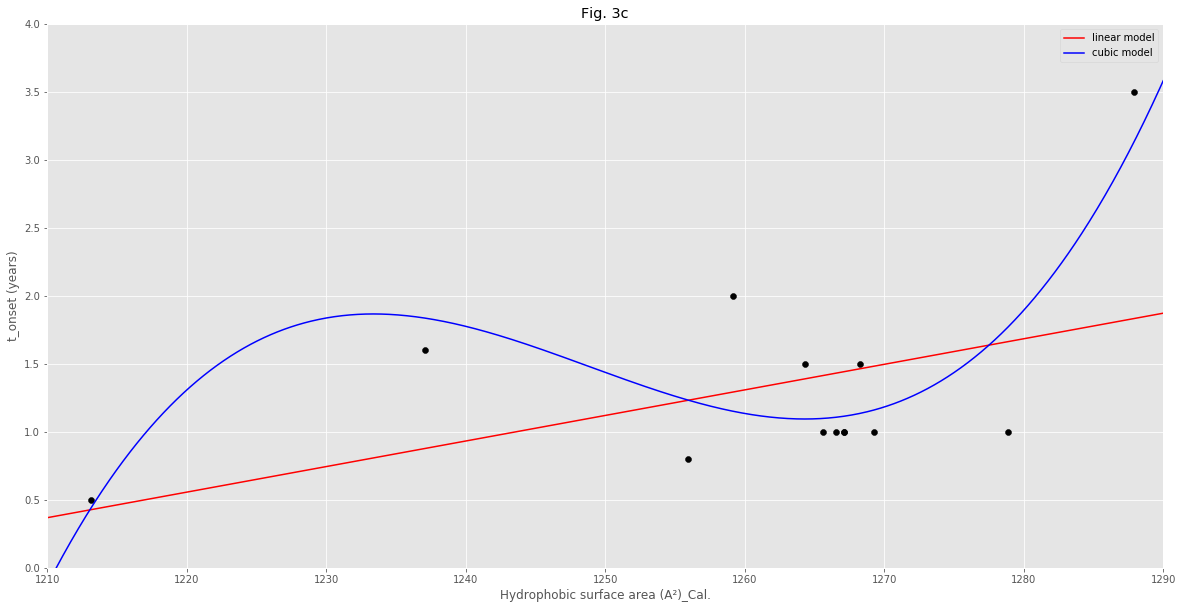

In [69]:
#Figure 3c
x_limits_fig_3c = [1210, 1290]
x_fig_3c = np.linspace(x_limits_fig_3c[0], x_limits_fig_3c[1], 1000)

#Plot data
plt.figure(figsize = (20, 10))
plt.scatter(AllHydrophobicSASFig3c, AllTotalABFig3c, c = 'k')

# Generate Linear Model
guess_params_linear_fig_3c = [0.1, -100]
linear_model_fig_3c = generate_linear_model(AllHydrophobicSASFig3c, AllTotalABFig3c, guess_params_linear_fig_3c, residuals_OLS)

# Generate Cubic Model
guess_params_cubic_fig_3c = [1, 1, 1, 1]
cubic_model_fig_3c = generate_linear_model(AllHydrophobicSASFig3c, AllTotalABFig3c, guess_params_cubic_fig_3c, residuals_CLS)

# Plot Models
plt.plot(x_fig_3c, generate_linear_y(x_fig_3c, linear_model_fig_3c[1]), c = 'r', label = 'linear model')
plt.plot(x_fig_3c, generate_cubic_y(x_fig_3c, cubic_model_fig_3c[1]), c = 'b', label = 'cubic model')

#Set axis limits
axis = plt.gca()
axis.set_xlim(x_limits_fig_3c)
axis.set_ylim([0,4])

#Labels
plt.title('Fig. 3c')
plt.legend()
plt.xlabel('Hydrophobic surface area (A²)_Cal.')
plt.ylabel('t_onset (years)')

plt.show()

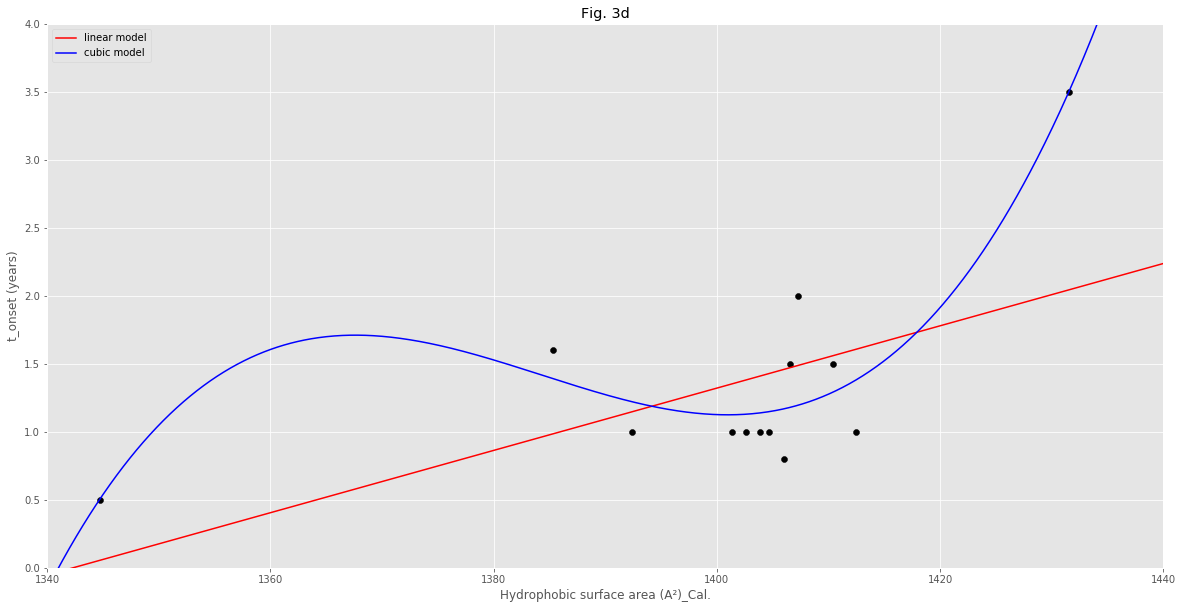

In [70]:
#Figure 3d
x_limits_fig_3d = [1340, 1440]
x_fig_3d = np.linspace(x_limits_fig_3d[0], x_limits_fig_3d[1], 1000)

#Plot data
plt.figure(figsize = (20, 10))
plt.scatter(AllHydrophobicSASFig3d, AllTotalABFig3d, c = 'k')

# Generate Linear Model
guess_params_linear_fig_3d = [0.1, -100]
linear_model_fig_3d = generate_linear_model(AllHydrophobicSASFig3d, AllTotalABFig3d, guess_params_linear_fig_3d, residuals_OLS)

# Generate Cubic Model
guess_params_cubic_fig_3d = [1, 1, 1, 1]
cubic_model_fig_3d = generate_linear_model(AllHydrophobicSASFig3d, AllTotalABFig3d, guess_params_cubic_fig_3d, residuals_CLS)

# Plot Models
plt.plot(x_fig_3d, generate_linear_y(x_fig_3d, linear_model_fig_3d[1]), c = 'r', label = 'linear model')
plt.plot(x_fig_3d, generate_cubic_y(x_fig_3d, cubic_model_fig_3d[1]), c = 'b', label = 'cubic model')

#Set axis limits
axis = plt.gca()
axis.set_xlim(x_limits_fig_3d)
axis.set_ylim([0,4])

#Labels
plt.title('Fig. 3d')
plt.legend()
plt.xlabel('Hydrophobic surface area (A²)_Cal.')
plt.ylabel('t_onset (years)')

plt.show()

#### Cross validating figure 2a

Sum Squared Error =  [0.8716108278258108]


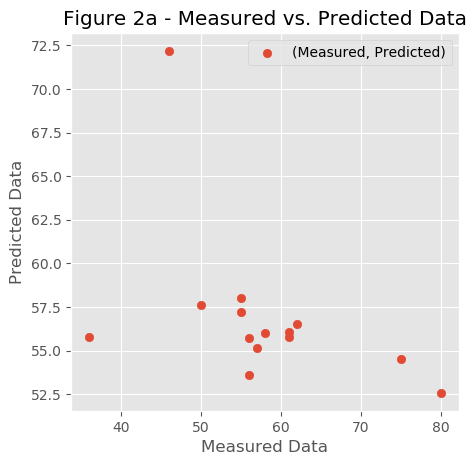

In [71]:
from sklearn.model_selection import LeaveOneOut

loo = LeaveOneOut()
guess_params_linear_fig_2a = [-4, 300]   #(slope, y-int)

TrainedLinearModel = []
NewYLinearModel = []
PredictionErrors = []
YTestsArray = []
LinearYValues = []
SquaredError = []
SumSquaredError = []

#Cross validate
for train_index, test_index in loo.split(AllHydrophobicSASFig2a):
        x_train, x_test = (AllHydrophobicSASFig2a)[train_index], (AllHydrophobicSASFig2a)[test_index]
        y_train, y_test = (AllTOnsetFig2a)[train_index], (AllTOnsetFig2a)[test_index]
        
        #Generate linear model with train data
        TrainedLinearModel = generate_linear_model(x_train, y_train, guess_params_linear_fig_2a, residuals_OLS)
        
        #New y linear model
        NewYLinearModel = generate_linear_y(x_test, TrainedLinearModel[1])
        LinearYValues.append(NewYLinearModel)
        NewYValues = np.asarray(LinearYValues)
        NewYValues = np.squeeze(NewYValues)
        
        #YTests
        YTestsArray.append(y_test)
        YTestsArrayNew = np.asarray(YTestsArray)
        YTestsArrayNew = np.squeeze(YTestsArrayNew)
        
        #Prediction Errors
        PredictionErrors.append(NewYLinearModel - y_test)
        NewPredictionErrors = np.asarray(PredictionErrors)
        NewPredictionErrors = np.squeeze(NewPredictionErrors)

#Caluclate sum squared error error
for i in range(len(YTestsArrayNew)):
    SquaredErrorNumerator = (YTestsArrayNew[i] - NewYValues[i])**2
    SquaredErrorDenominator = (YTestsArrayNew[i])**2
    TotalSquaredError = SquaredErrorNumerator/SquaredErrorDenominator
    SquaredError.append(TotalSquaredError)

SumSquaredError.append(sum(SquaredError))
print("Sum Squared Error = " ,SumSquaredError)
  
#Plot measured vs. predicted
plt.figure(10, figsize=(5,5), dpi=100)
plt.scatter(YTestsArrayNew, NewYValues, label='(Measured, Predicted)')
plt.xlabel('Measured Data')
plt.ylabel('Predicted Data')
plt.title('Figure 2a - Measured vs. Predicted Data')
plt.legend()
plt.show()

#### Cross validating figure 3a

Sum Squared Error =  [2.8177787140217436]


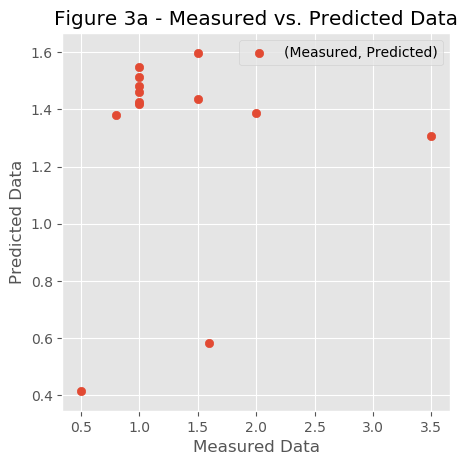

In [72]:
guess_params_linear_fig_3a = [0.1, -100]   #(slope, y-int)

TrainedLinearModel = []
NewYLinearModel = []
PredictionErrors = []
YTestsArray = []
LinearYValues = []
SquaredError = []
SumSquaredError = []

#Cross validate
for train_index, test_index in loo.split(AllHydrophobicSASFig3a):
        x_train, x_test = (AllHydrophobicSASFig3a)[train_index], (AllHydrophobicSASFig3a)[test_index]
        y_train, y_test = (AllTotalABFig3a)[train_index], (AllTotalABFig3a)[test_index]
        
        #Generate linear model with train data
        TrainedLinearModel = generate_linear_model(x_train, y_train, guess_params_linear_fig_3a, residuals_OLS)
        
        #New y linear model
        NewYLinearModel = generate_linear_y(x_test, TrainedLinearModel[1])
        LinearYValues.append(NewYLinearModel)
        NewYValues = np.asarray(LinearYValues)
        NewYValues = np.squeeze(NewYValues)
        
        #YTests
        YTestsArray.append(y_test)
        YTestsArrayNew = np.asarray(YTestsArray)
        YTestsArrayNew = np.squeeze(YTestsArrayNew)
        
        #Prediction Errors
        PredictionErrors.append(NewYLinearModel - y_test)
        NewPredictionErrors = np.asarray(PredictionErrors)
        NewPredictionErrors = np.squeeze(NewPredictionErrors)

#Caluclate sum squared error error
for i in range(len(NewYTestsArray)):
    SquaredErrorNumerator = (YTestsArrayNew[i] - NewYValues[i])**2
    SquaredErrorDenominator = (YTestsArrayNew[i])**2
    TotalSquaredError = SquaredErrorNumerator/SquaredErrorDenominator
    SquaredError.append(TotalSquaredError)

SumSquaredError.append(sum(SquaredError))
print("Sum Squared Error = " ,SumSquaredError)
  
#Plot measured vs. predicted
plt.figure(10, figsize=(5,5), dpi=100)
plt.scatter(YTestsArrayNew, NewYValues, label='(Measured, Predicted)')
plt.xlabel('Measured Data')
plt.ylabel('Predicted Data')
plt.title('Figure 3a - Measured vs. Predicted Data')
plt.legend()
plt.show()

#### Fig. S5 Plots

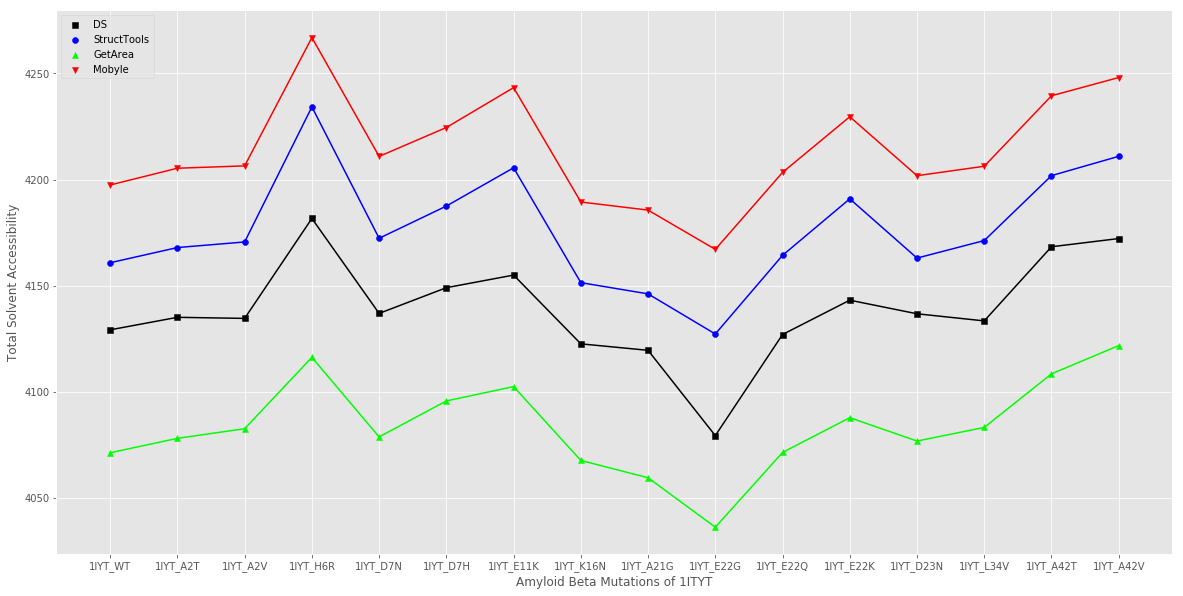

In [28]:
# Recreate Fig S5A
# Store Web based tools output
DS_1IYT = _1IYT_tot_solv_acc[:, 0]
ST_1ITYT = _1IYT_tot_solv_acc[:, 1]
GA_1IYT = _1IYT_tot_solv_acc[:, 2]
M_1ITYT = _1IYT_tot_solv_acc[:, 3]

# Plot data with smoothed curve
plt.figure(figsize = (20, 10))

plt.scatter(_1IYT_conform, DS_1IYT, label = web_based_tools[0], c = 'k', marker = 's')
plt.plot(_1IYT_conform, DS_1IYT, c = 'k')

plt.scatter(_1IYT_conform, ST_1ITYT, label = web_based_tools[1], c = 'b', marker = 'o')
plt.plot(_1IYT_conform, ST_1ITYT, c = 'b')

plt.scatter(_1IYT_conform, GA_1IYT, label = web_based_tools[2], c = 'lime', marker = '^')
plt.plot(_1IYT_conform, GA_1IYT, c = 'lime')

plt.scatter(_1IYT_conform, M_1ITYT, label = web_based_tools[3], c = 'r', marker = 'v')
plt.plot(_1IYT_conform, M_1ITYT, c = 'r')

plt.xlabel('Amyloid Beta Mutations of 1ITYT')
plt.ylabel('Total Solvent Accessibility')
plt.legend()
plt.show()

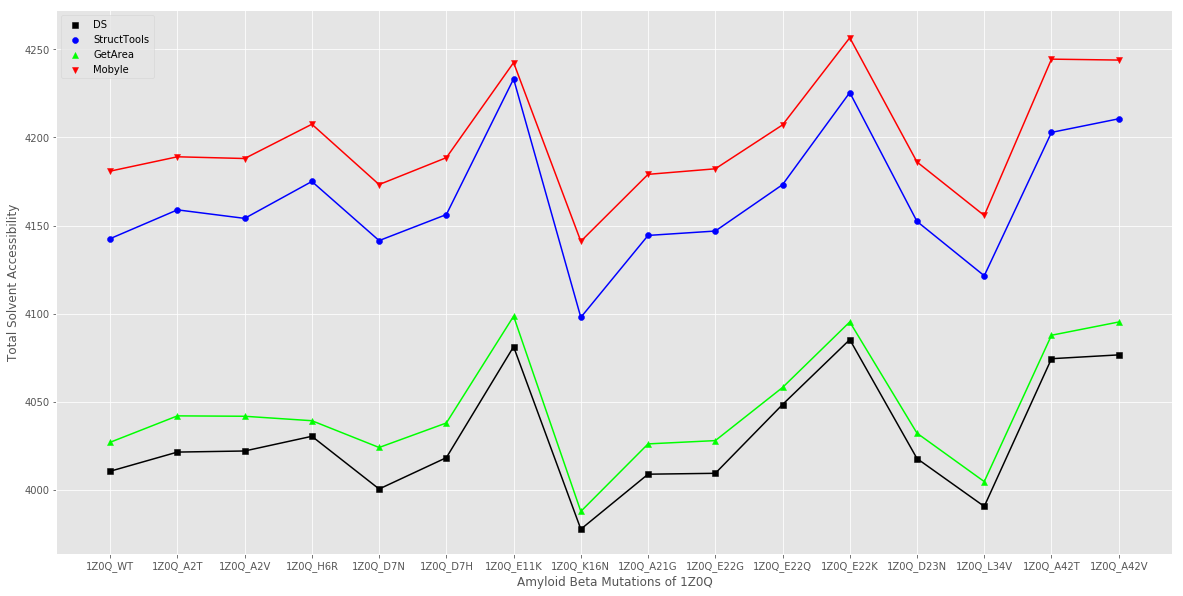

In [29]:
# Recreate Fig S5B
# Store Web based tools output
DS_1Z0Q = _1Z0Q_tot_solv_acc[:, 0]
ST_1Z0Q = _1Z0Q_tot_solv_acc[:, 1]
GA_1Z0Q = _1Z0Q_tot_solv_acc[:, 2]
M_1Z0Q = _1Z0Q_tot_solv_acc[:, 3]

# Plot data with smoothed curve
plt.figure(figsize = (20, 10))

plt.scatter(_1Z0Q_conform, DS_1Z0Q, label = web_based_tools[0], c = 'k', marker = 's')
plt.plot(_1Z0Q_conform, DS_1Z0Q, c = 'k')

plt.scatter(_1Z0Q_conform, ST_1Z0Q, label = web_based_tools[1], c = 'b', marker = 'o')
plt.plot(_1Z0Q_conform, ST_1Z0Q, c = 'b')

plt.scatter(_1Z0Q_conform, GA_1Z0Q, label = web_based_tools[2], c = 'lime', marker = '^')
plt.plot(_1Z0Q_conform, GA_1Z0Q, c = 'lime')

plt.scatter(_1Z0Q_conform, M_1Z0Q, label = web_based_tools[3], c = 'r', marker = 'v')
plt.plot(_1Z0Q_conform, M_1Z0Q, c = 'r')

plt.xlabel('Amyloid Beta Mutations of 1Z0Q')
plt.ylabel('Total Solvent Accessibility')
plt.legend()
plt.show()

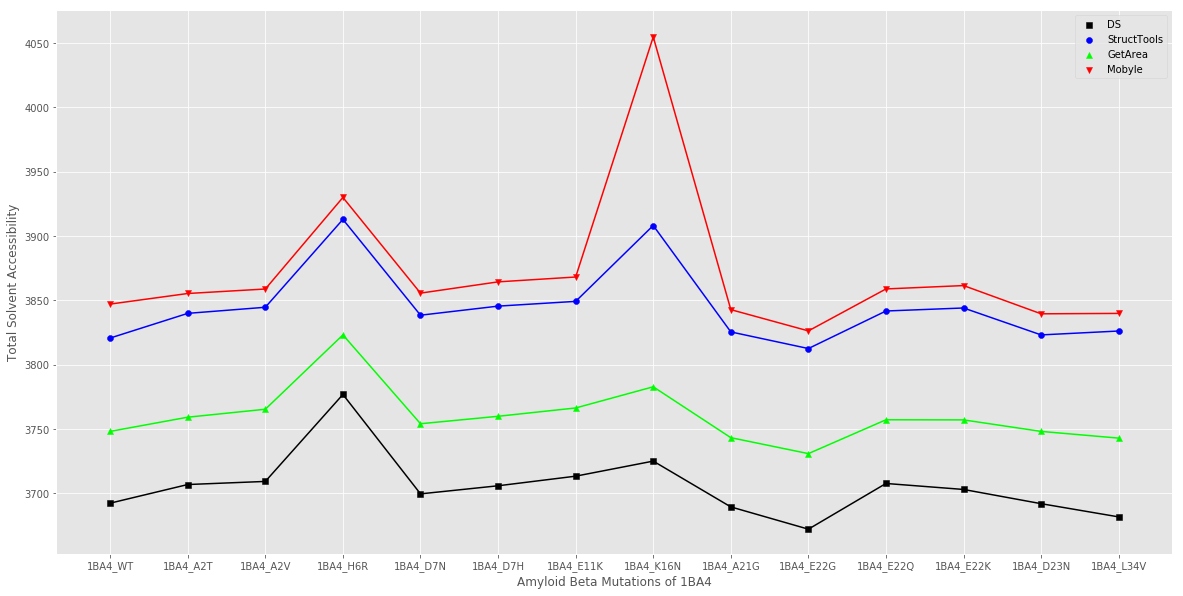

In [30]:
# Recreate Fig S5C
# Store Web based tools output
DS_1BA4 = _1BA4_tot_solv_acc[:, 0]
ST_1BA4 = _1BA4_tot_solv_acc[:, 1]
GA_1BA4 = _1BA4_tot_solv_acc[:, 2]
M_1BA4 = _1BA4_tot_solv_acc[:, 3]

# Plot data with smoothed curve
plt.figure(figsize = (20, 10))

plt.scatter(_1BA4_conform, DS_1BA4, label = web_based_tools[0], c = 'k', marker = 's')
plt.plot(_1BA4_conform, DS_1BA4, c = 'k')

plt.scatter(_1BA4_conform, ST_1BA4, label = web_based_tools[1], c = 'b', marker = 'o')
plt.plot(_1BA4_conform, ST_1BA4, c = 'b')

plt.scatter(_1BA4_conform, GA_1BA4, label = web_based_tools[2], c = 'lime', marker = '^')
plt.plot(_1BA4_conform, GA_1BA4, c = 'lime')

plt.scatter(_1BA4_conform, M_1BA4, label = web_based_tools[3], c = 'r', marker = 'v')
plt.plot(_1BA4_conform, M_1BA4, c = 'r')

plt.xlabel('Amyloid Beta Mutations of 1BA4')
plt.ylabel('Total Solvent Accessibility')
plt.legend()
plt.show()

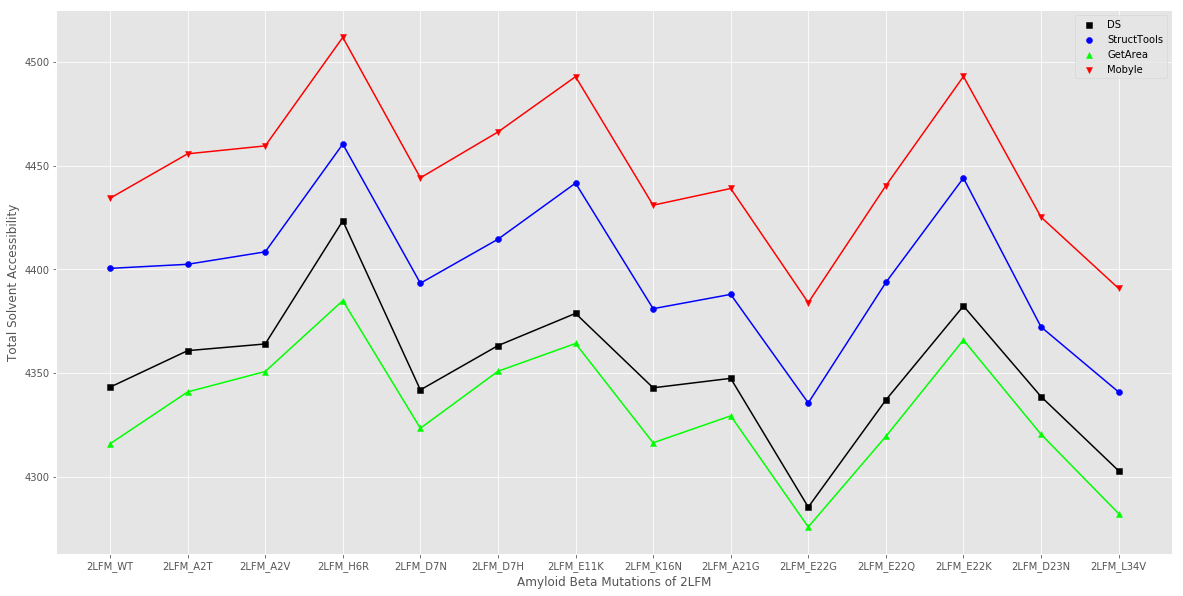

In [31]:
# Recreate Fig S5D
# Store Web based tools output
DS_2LFM = _2LFM_tot_solv_acc[:, 0]
ST_2LFM = _2LFM_tot_solv_acc[:, 1]
GA_2LFM = _2LFM_tot_solv_acc[:, 2]
M_2LFM = _2LFM_tot_solv_acc[:, 3]

# Plot data with smoothed curve
plt.figure(figsize = (20, 10))

plt.scatter(_2LFM_conform, DS_2LFM, label = web_based_tools[0], c = 'k', marker = 's')
plt.plot(_2LFM_conform, DS_2LFM, c = 'k')

plt.scatter(_2LFM_conform, ST_2LFM, label = web_based_tools[1], c = 'b', marker = 'o')
plt.plot(_2LFM_conform, ST_2LFM, c = 'b')

plt.scatter(_2LFM_conform, GA_2LFM, label = web_based_tools[2], c = 'lime', marker = '^')
plt.plot(_2LFM_conform, GA_2LFM, c = 'lime')

plt.scatter(_2LFM_conform, M_2LFM, label = web_based_tools[3], c = 'r', marker = 'v')
plt.plot(_2LFM_conform, M_2LFM, c = 'r')

plt.xlabel('Amyloid Beta Mutations of 2LFM')
plt.ylabel('Total Solvent Accessibility')
plt.legend()
plt.show()

#### Reproduce the plots seen in Fig. S7

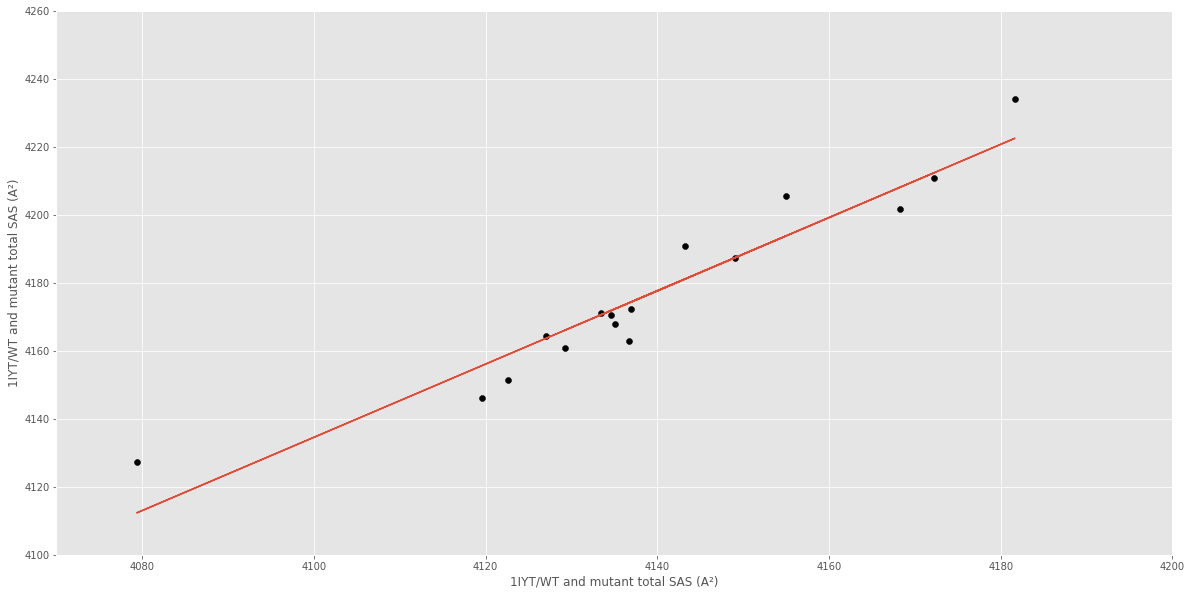

In [32]:
#Figure 7a

#Plot figure and points
plt.figure(figsize = (20, 10))
plt.scatter(DS_1IYT, ST_1ITYT, c = 'k')

# Generate Model
guess_params_fig_7a = [1, 0]
model_fig_7a = generate_linear_model(DS_1IYT, ST_1ITYT, guess_params_fig_7a, residuals_OLS)

# Plot Model
plt.plot(DS_1IYT, model_fig_7a[0])

#Set axis limits
axis = plt.gca()
axis.set_xlim([4070,4200])
axis.set_ylim([4100,4260])

#Labels
plt.xlabel('1IYT/WT and mutant total SAS (A²)')
plt.ylabel('1IYT/WT and mutant total SAS (A²)')

plt.show()

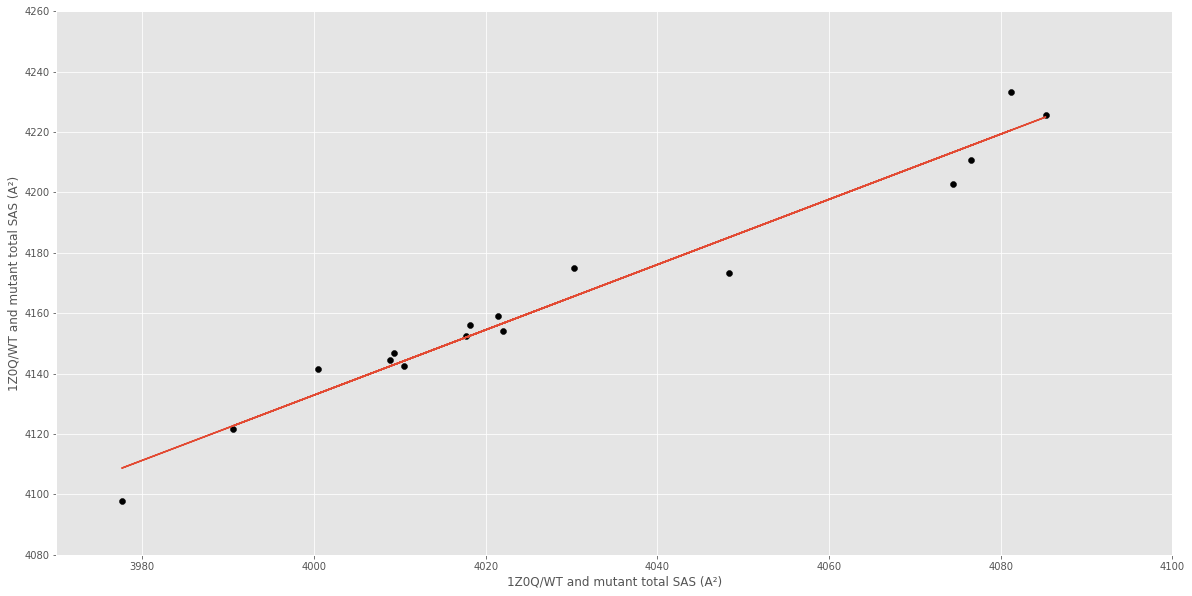

In [33]:
#Figure 7b

#Plot figure and points
plt.figure(figsize = (20, 10))
plt.scatter(DS_1Z0Q, ST_1Z0Q, c = 'k')

# Generate Model
guess_params_fig_7b = [1, 0]
model_fig_7b = generate_linear_model(DS_1Z0Q, ST_1Z0Q, guess_params_fig_7b, residuals_OLS)

# Plot Model
plt.plot(DS_1Z0Q, model_fig_7b[0])

#Set axis limits
axis = plt.gca()
axis.set_xlim([3970,4100])
axis.set_ylim([4080,4260])

#Labels
plt.xlabel('1Z0Q/WT and mutant total SAS (A²)')
plt.ylabel('1Z0Q/WT and mutant total SAS (A²)')

plt.show()

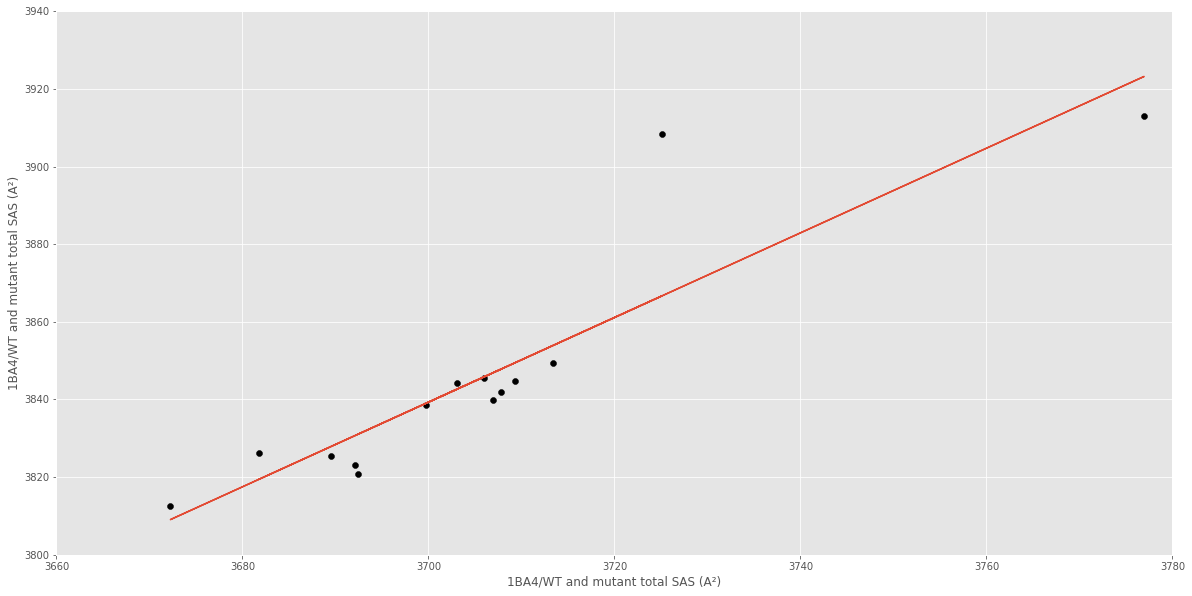

In [34]:
#Figure 7c

#Plot figure and points
plt.figure(figsize = (20, 10))
plt.scatter(DS_1BA4, ST_1BA4, c = 'k')

# Generate Model
guess_params_fig_7c = [1, 0]
model_fig_7c = generate_linear_model(DS_1BA4, ST_1BA4, guess_params_fig_7c, residuals_OLS)

# Plot Model
plt.plot(DS_1BA4, model_fig_7c[0])

#Set axis limits
axis = plt.gca()
axis.set_xlim([3660,3780])
axis.set_ylim([3800,3940])

#Labels
plt.xlabel('1BA4/WT and mutant total SAS (A²)')
plt.ylabel('1BA4/WT and mutant total SAS (A²)')

plt.show()

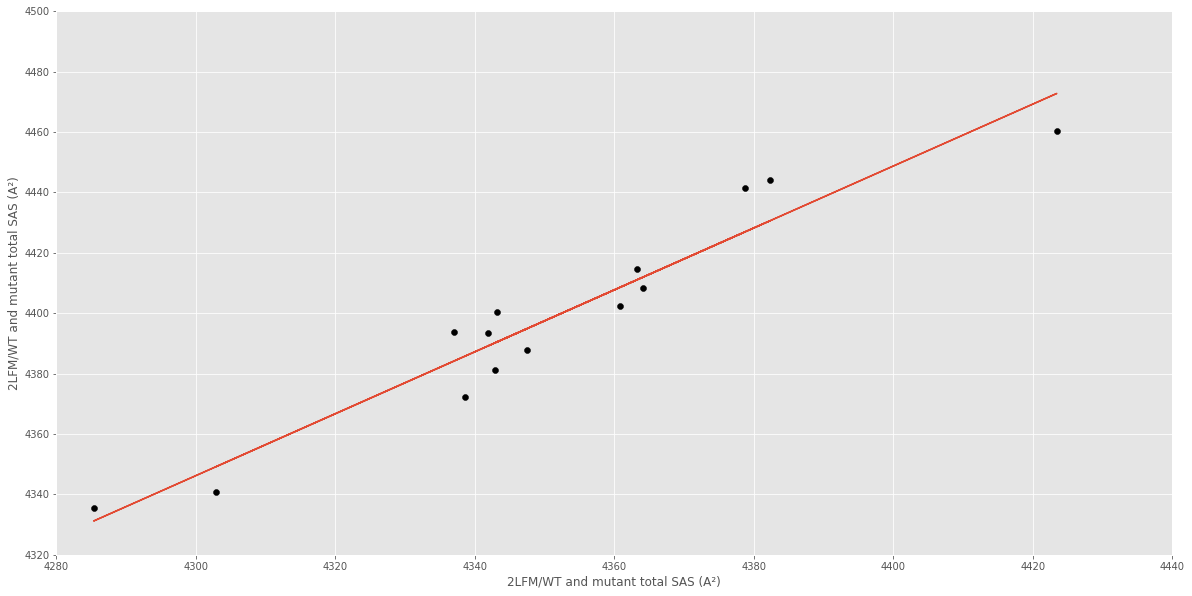

In [35]:
#Figure 7d

#Plot figure and points
plt.figure(figsize = (20, 10))
plt.scatter(DS_2LFM, ST_2LFM, c = 'k')

# Generate Model
guess_params_fig_7d = [1, 0]
model_fig_7d = generate_linear_model(DS_2LFM, ST_2LFM, guess_params_fig_7d, residuals_OLS)

# Plot Model
plt.plot(DS_2LFM, model_fig_7d[0])

#Set axis limits
axis = plt.gca()
axis.set_xlim([4280,4440])
axis.set_ylim([4320,4500])

#Labels
plt.xlabel('2LFM/WT and mutant total SAS (A²)')
plt.ylabel('2LFM/WT and mutant total SAS (A²)')

plt.show()

#### Upload hydrophobic and hydrophilic SAS areas and reproduce the plots in Fig. S8

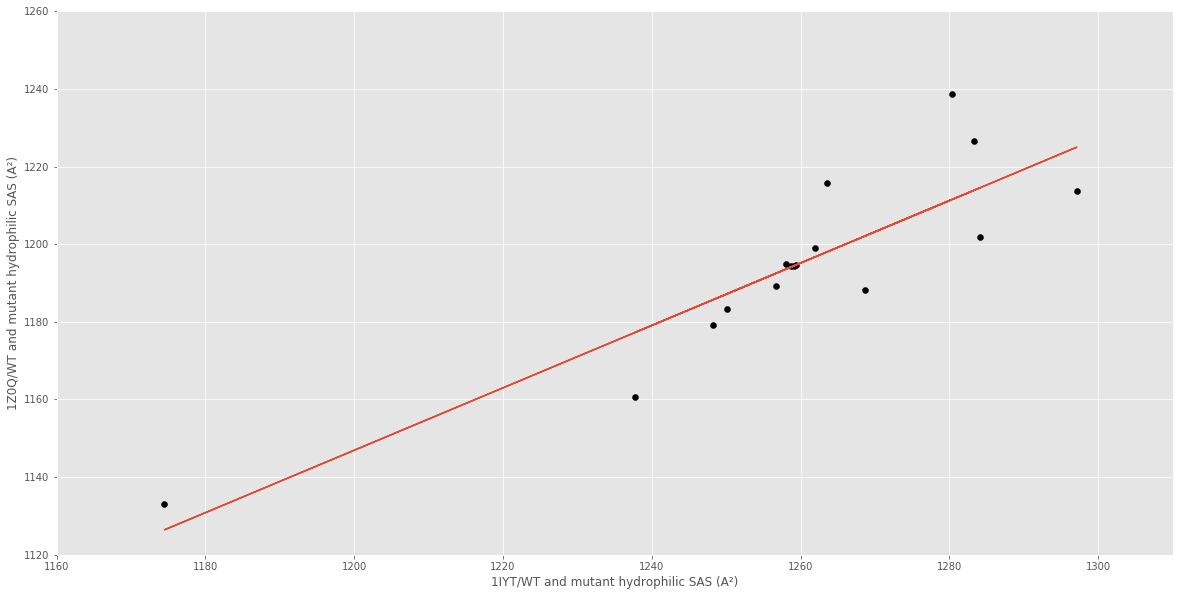

In [36]:
#Figure 8a
_1IYT_hydrophilic_SAS = _1IYT_hydro_SAS[:, 1]
_1Z0Q_hydrophilic_SAS = _1Z0Q_hydro_SAS[:, 1]

# Plot data with smoothed curve
plt.figure(figsize = (20, 10))
plt.scatter(_1IYT_hydrophilic_SAS, _1Z0Q_hydrophilic_SAS, c = 'k')

# Generate Model
guess_params_fig_8a = [1, 0]
model_fig_8a = generate_linear_model(_1IYT_hydrophilic_SAS, _1Z0Q_hydrophilic_SAS, guess_params_fig_8a, residuals_OLS)

# Plot Model
plt.plot(_1IYT_hydrophilic_SAS, model_fig_8a[0])

#Set axis limits
axis = plt.gca()
axis.set_xlim([1160,1310])
axis.set_ylim([1120,1260])

#Labels
plt.xlabel('1IYT/WT and mutant hydrophilic SAS (A²)')
plt.ylabel('1Z0Q/WT and mutant hydrophilic SAS (A²)')

plt.show()

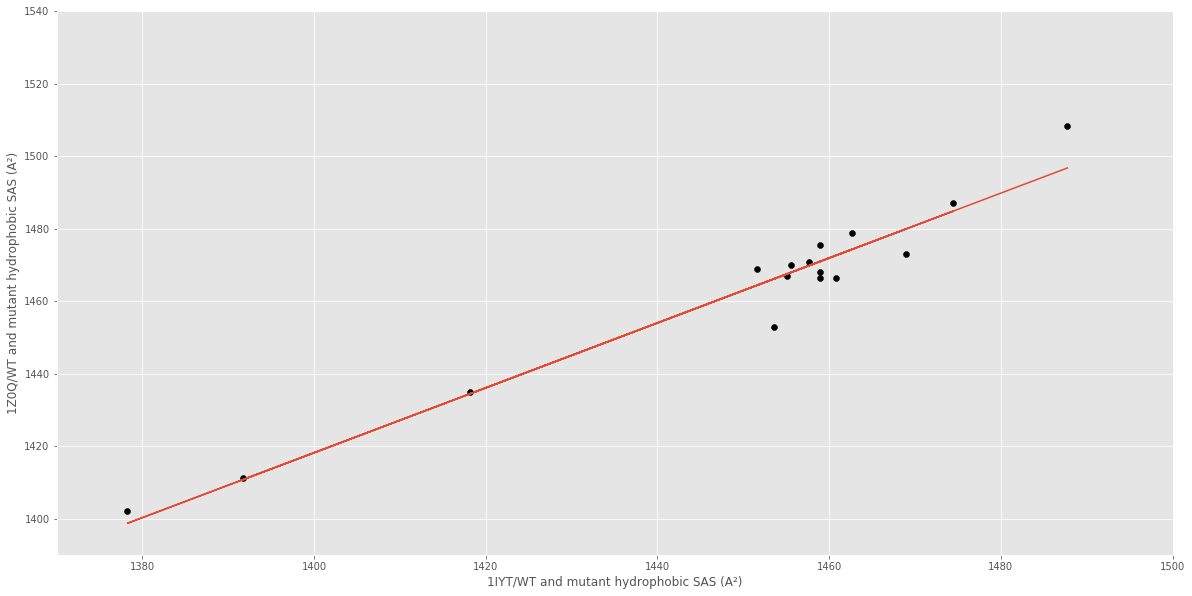

In [37]:
#Figure 8b

# Plot data with smoothed curve
plt.figure(figsize = (20, 10))
plt.scatter(_1IYT_hydrophobic_SAS, _1Z0Q_hydrophobic_SAS, c = 'k')

# Generate Model
guess_params_fig_8b = [1, 0]
model_fig_8b = generate_linear_model(_1IYT_hydrophobic_SAS, _1Z0Q_hydrophobic_SAS, guess_params_fig_8b, residuals_OLS)

# Plot Model
plt.plot(_1IYT_hydrophobic_SAS, model_fig_8b[0])

#Set axis limits
axis = plt.gca()
axis.set_xlim([1370,1500])
axis.set_ylim([1390,1540])

#Labels
plt.xlabel('1IYT/WT and mutant hydrophobic SAS (A²)')
plt.ylabel('1Z0Q/WT and mutant hydrophobic SAS (A²)')

plt.show()

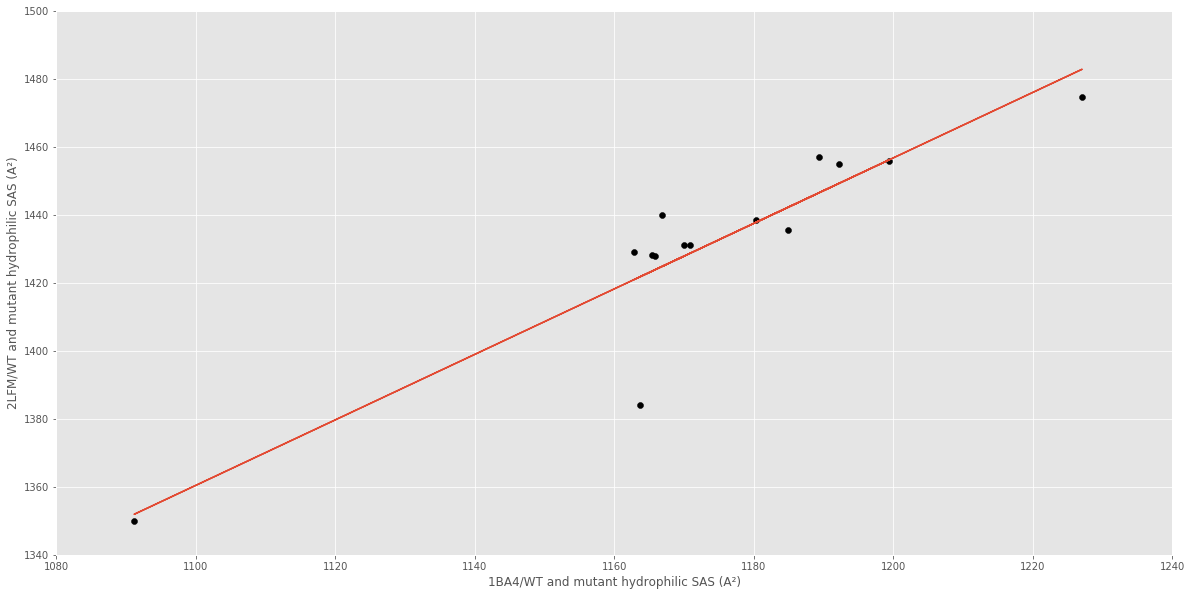

In [38]:
#Figure 8c
_1BA4_hydrophilic_SAS = _1BA4_hydro_SAS[:, 1]
_2LFM_hydrophilic_SAS = _2LFM_hydro_SAS[:, 1]

# Plot data with smoothed curve
plt.figure(figsize = (20, 10))
plt.scatter(_1BA4_hydrophilic_SAS, _2LFM_hydrophilic_SAS, c = 'k')

# Generate Model
guess_params_fig_8c = [1, 0]
model_fig_8c = generate_linear_model(_1BA4_hydrophilic_SAS, _2LFM_hydrophilic_SAS, guess_params_fig_8c, residuals_OLS)

# Plot Model
plt.plot(_1BA4_hydrophilic_SAS, model_fig_8c[0])

#Set axis limits
axis = plt.gca()
axis.set_xlim([1080,1240])
axis.set_ylim([1340,1500])

#Labels
plt.xlabel('1BA4/WT and mutant hydrophilic SAS (A²)')
plt.ylabel('2LFM/WT and mutant hydrophilic SAS (A²)')

plt.show()

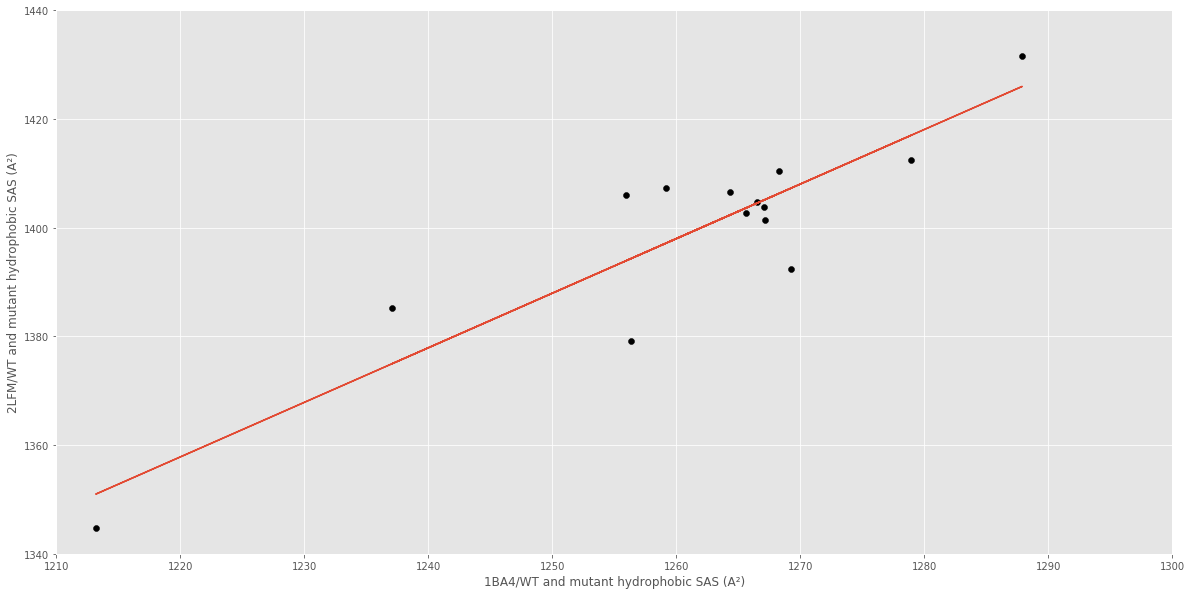

In [39]:
#Figure 8d

# Plot data with smoothed curve
plt.figure(figsize = (20, 10))
plt.scatter(_1BA4_hydrophobic_SAS, _2LFM_hydrophobic_SAS, c = 'k')

# Generate Model
guess_params_fig_8d = [1, 0]
model_fig_8d = generate_linear_model(_1BA4_hydrophobic_SAS, _2LFM_hydrophobic_SAS, guess_params_fig_8d, residuals_OLS)

# Plot Model
plt.plot(_1BA4_hydrophobic_SAS, model_fig_8d[0])

#Set axis limits
axis = plt.gca()
axis.set_xlim([1210,1300])
axis.set_ylim([1340,1440])

#Labels
plt.xlabel('1BA4/WT and mutant hydrophobic SAS (A²)')
plt.ylabel('2LFM/WT and mutant hydrophobic SAS (A²)')

plt.show()

#### Upload t_onset with conformation properties and reproduce the plots in Fig. S9 and Fig. S10

Text(0, 0.5, 't_onset (years)')

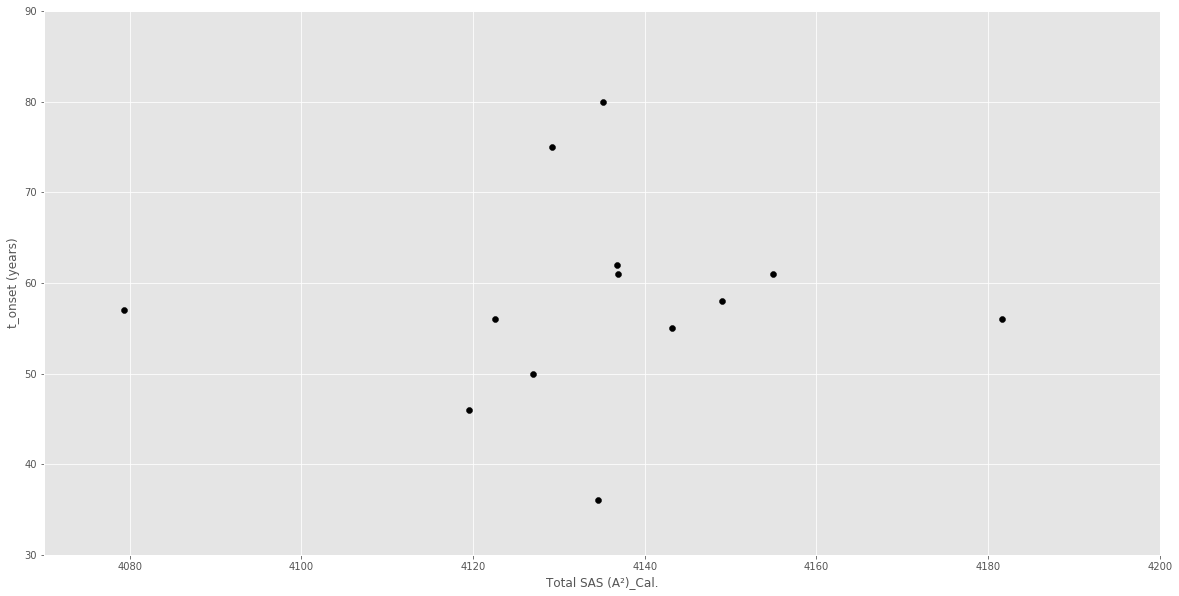

In [40]:
#Figure 9a
_1IYT_t_onset = _1IYT_t_onset_and_prop[:, 0]
_1IYT_total_SAS = _1IYT_t_onset_and_prop[:, 1]

# Plot data with smoothed curve
plt.figure(figsize = (20, 10))
plt.scatter(_1IYT_total_SAS, _1IYT_t_onset, c = 'k')

#Set axis limits
axis = plt.gca()
axis.set_xlim([4070,4200])
axis.set_ylim([30,90])

#Labels
plt.xlabel('Total SAS (A²)_Cal.')
plt.ylabel('t_onset (years)')

Text(0, 0.5, 't_onset (years)')

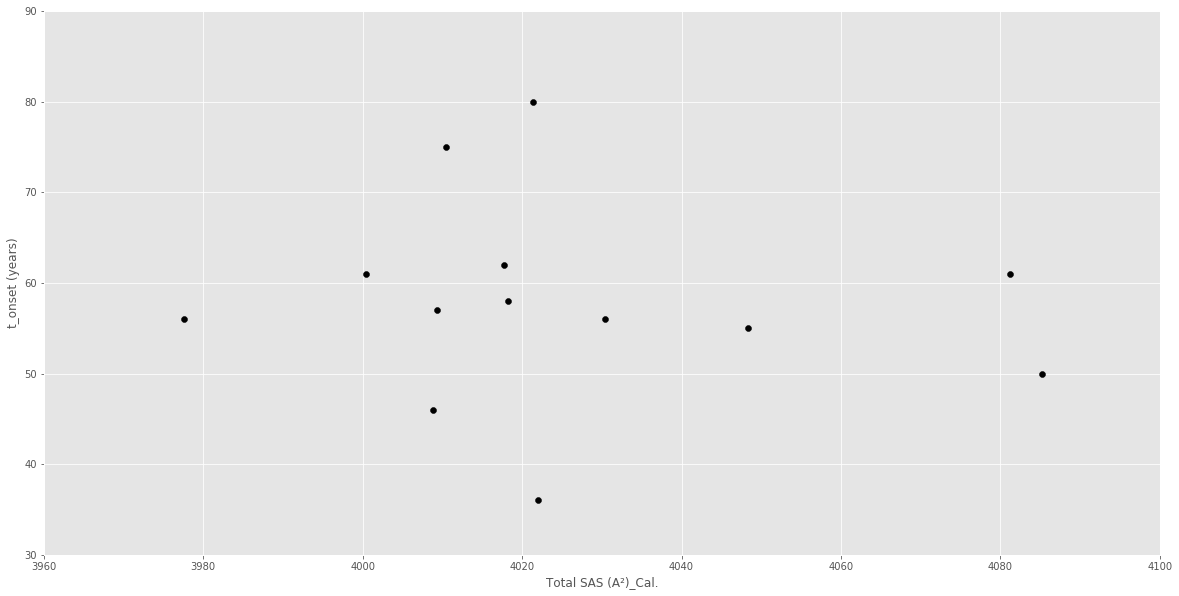

In [41]:
#Figure 9b
_1Z0Q_t_onset = _1Z0Q_t_onset_and_prop[:, 0]
_1Z0Q_total_SAS = _1Z0Q_t_onset_and_prop[:, 1]

# Plot data with smoothed curve
plt.figure(figsize = (20, 10))
plt.scatter(_1Z0Q_total_SAS, _1Z0Q_t_onset, c = 'k')

#Set axis limits
axis = plt.gca()
axis.set_xlim([3960,4100])
axis.set_ylim([30,90])

#Labels
plt.xlabel('Total SAS (A²)_Cal.')
plt.ylabel('t_onset (years)')

Text(0, 0.5, 't_onset (years)')

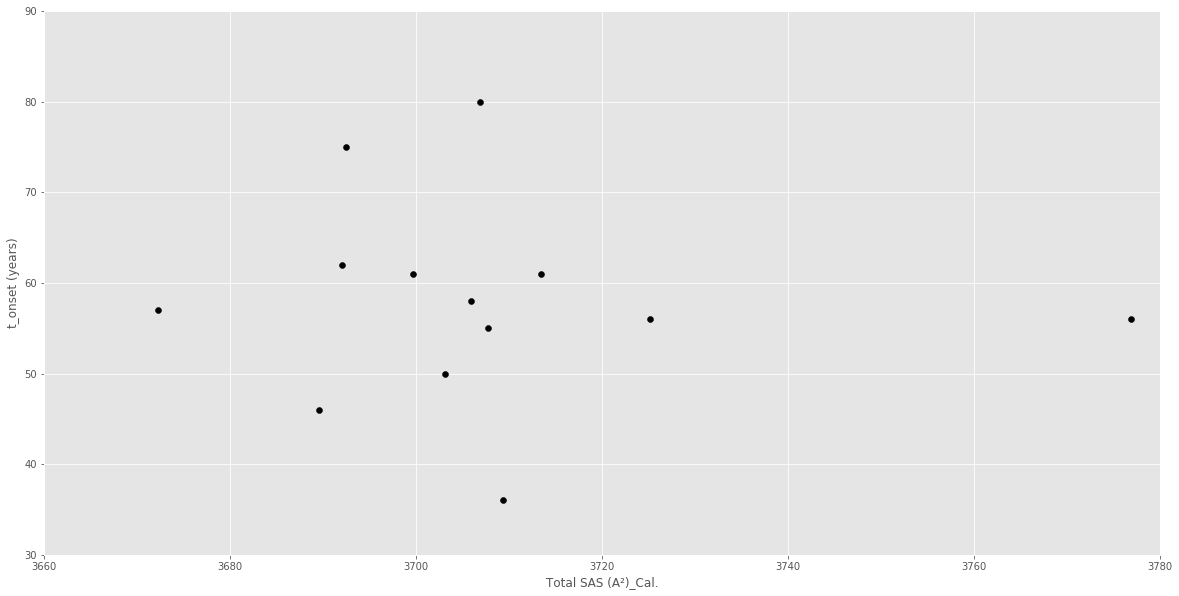

In [42]:
#Figure 9c
_1BA4_t_onset = _1BA4_t_onset_and_prop[:, 0]
_1BA4_total_SAS = _1BA4_t_onset_and_prop[:, 1]

# Plot data with smoothed curve
plt.figure(figsize = (20, 10))
plt.scatter(_1BA4_total_SAS, _1BA4_t_onset, c = 'k')

#Set axis limits
axis = plt.gca()
axis.set_xlim([3660,3780])
axis.set_ylim([30,90])

#Labels
plt.xlabel('Total SAS (A²)_Cal.')
plt.ylabel('t_onset (years)')

Text(0, 0.5, 't_onset (years)')

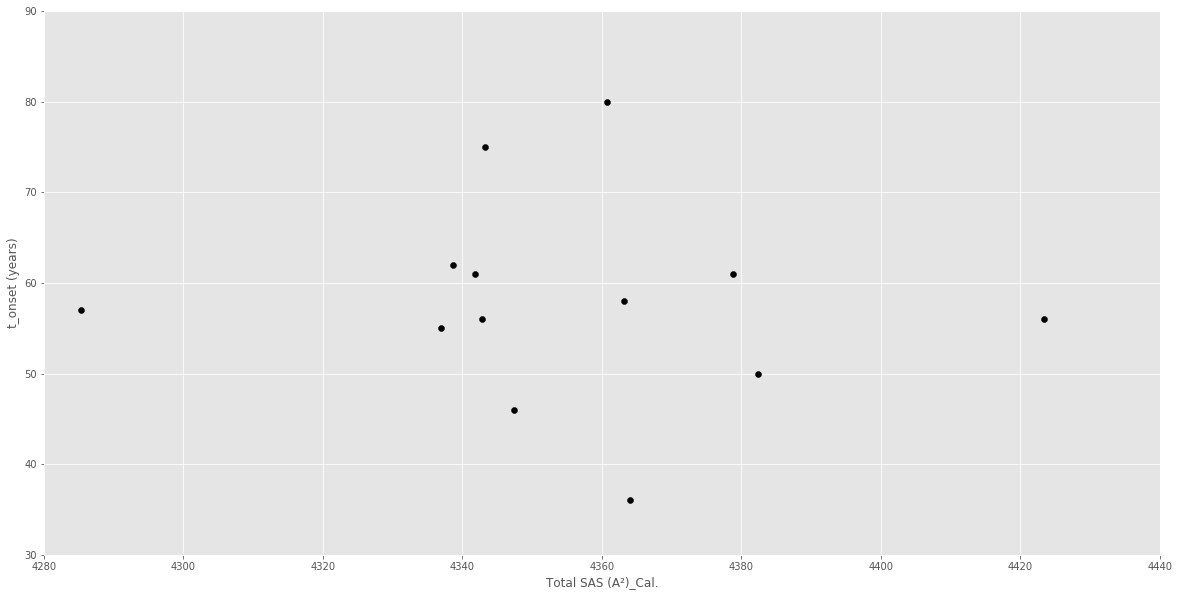

In [43]:
#Figure 9d
_2LFM_t_onset = _2LFM_t_onset_and_prop[:, 0]
_2LFM_total_SAS = _2LFM_t_onset_and_prop[:, 1]

# Plot data with smoothed curve
plt.figure(figsize = (20, 10))
plt.scatter(_2LFM_total_SAS, _2LFM_t_onset, c = 'k')

#Set axis limits
axis = plt.gca()
axis.set_xlim([4280,4440])
axis.set_ylim([30,90])

#Labels
plt.xlabel('Total SAS (A²)_Cal.')
plt.ylabel('t_onset (years)')

Text(0, 0.5, 't_onset (years)')

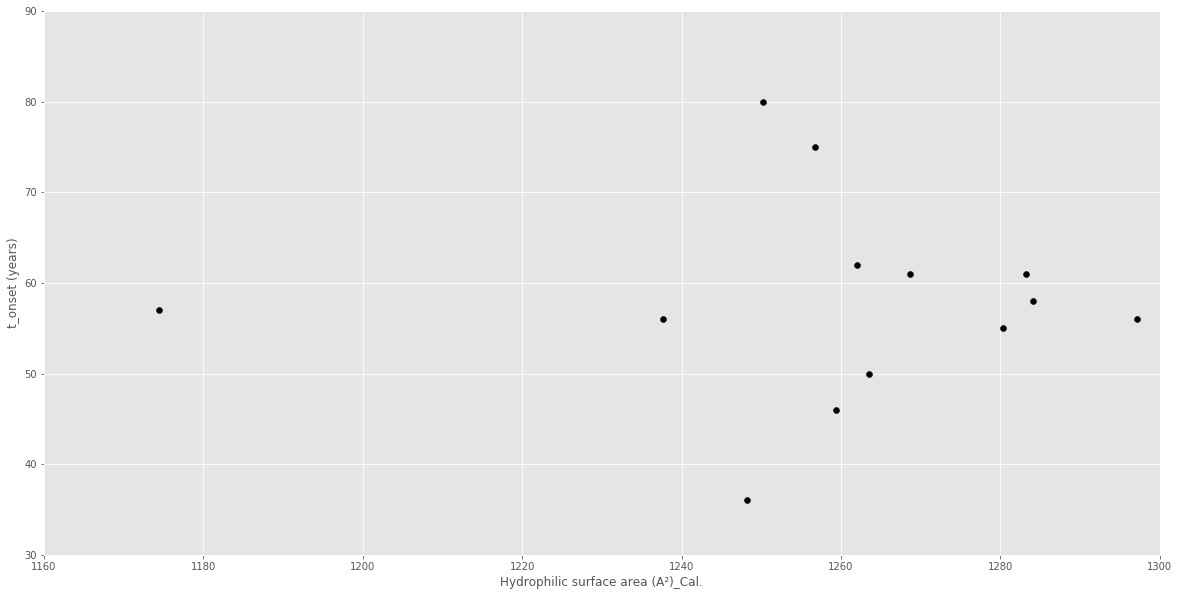

In [44]:
#Figure 10a
_1IYT_t_onset = _1IYT_t_onset_and_prop[:,0]
_1IYT_hydrophilic_SAS_2 = _1IYT_t_onset_and_prop[:,3]

# Plot data with smoothed curve
plt.figure(figsize = (20, 10))
plt.scatter(_1IYT_hydrophilic_SAS_2, _1IYT_t_onset, c = 'k')

#Set axis limits
axis = plt.gca()
axis.set_xlim([1160,1300])
axis.set_ylim([30,90])

#Labels
plt.xlabel('Hydrophilic surface area (A²)_Cal.')
plt.ylabel('t_onset (years)')

Text(0, 0.5, 't_onset (years)')

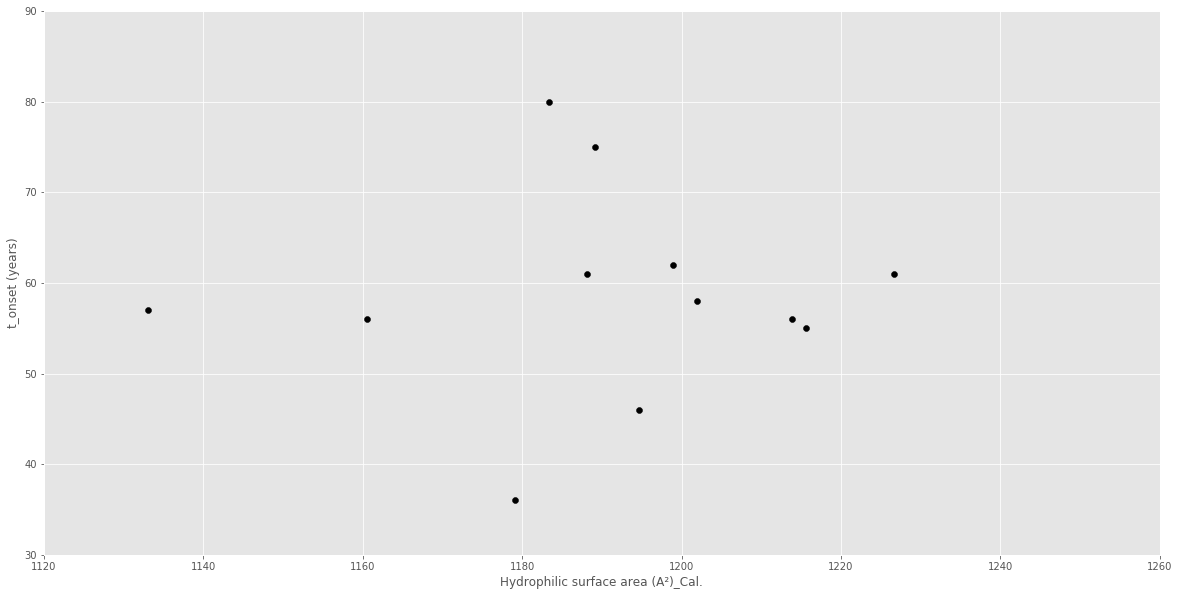

In [45]:
#Figure 10b
_1Z0Q_t_onset = _1Z0Q_t_onset_and_prop[:,0]
_1Z0Q_hydrophilic_SAS_2 = _1Z0Q_t_onset_and_prop[:,3]

# Plot data with smoothed curve
plt.figure(figsize = (20, 10))
plt.scatter(_1Z0Q_hydrophilic_SAS_2, _1Z0Q_t_onset, c = 'k')

#Set axis limits
axis = plt.gca()
axis.set_xlim([1120,1260])
axis.set_ylim([30,90])

#Labels
plt.xlabel('Hydrophilic surface area (A²)_Cal.')
plt.ylabel('t_onset (years)')

Text(0, 0.5, 't_onset (years)')

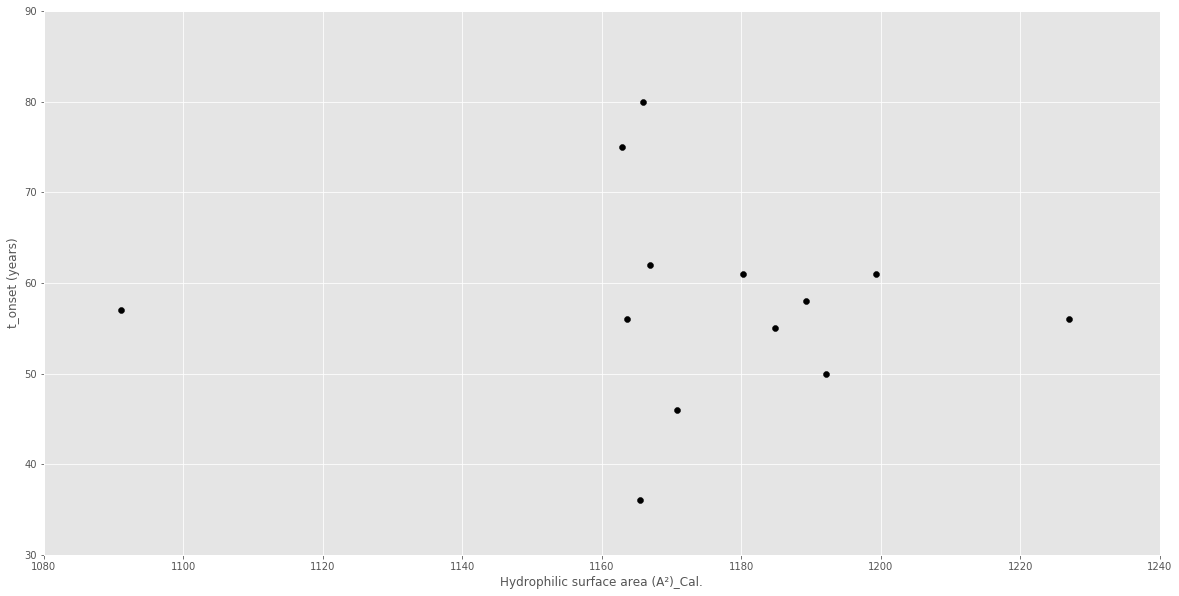

In [46]:
#Figure 10c
_1BA4_t_onset = _1BA4_t_onset_and_prop[:, 0]
_1BA4_hydrophilic_SAS_2 = _1BA4_t_onset_and_prop[:, 3]

# Plot data with smoothed curve
plt.figure(figsize = (20, 10))
plt.scatter(_1BA4_hydrophilic_SAS_2, _1BA4_t_onset, c = 'k')

#Set axis limits
axis = plt.gca()
axis.set_xlim([1080,1240])
axis.set_ylim([30,90])

#Labels
plt.xlabel('Hydrophilic surface area (A²)_Cal.')
plt.ylabel('t_onset (years)')

Text(0, 0.5, 't_onset (years)')

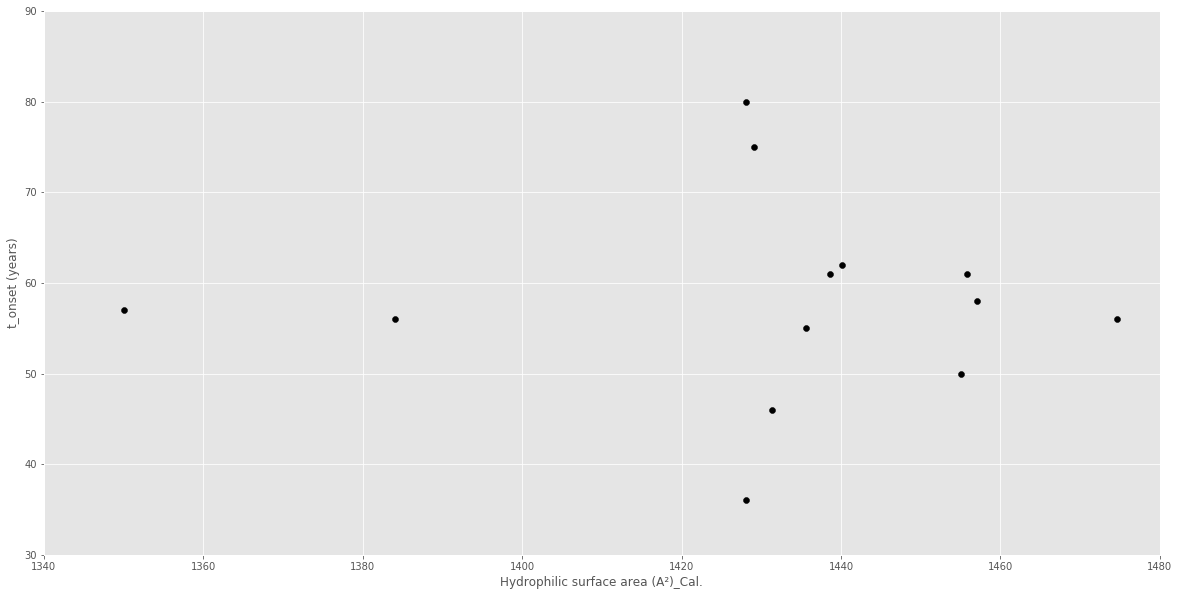

In [47]:
#Figure 10d
_2LFM_t_onset = _2LFM_t_onset_and_prop[:, 0]
_2LFM_hydrophilic_SAS_2 = _2LFM_t_onset_and_prop[:, 3]

# Plot data with smoothed curve
plt.figure(figsize = (20, 10))
plt.scatter(_2LFM_hydrophilic_SAS_2, _2LFM_t_onset, c = 'k')

#Set axis limits
axis = plt.gca()
axis.set_xlim([1340,1480])
axis.set_ylim([30,90])

#Labels
plt.xlabel('Hydrophilic surface area (A²)_Cal.')
plt.ylabel('t_onset (years)')

#### Reproduce the plots in Fig. S11 and Fig. S12

Text(0, 0.5, 'Total AB')

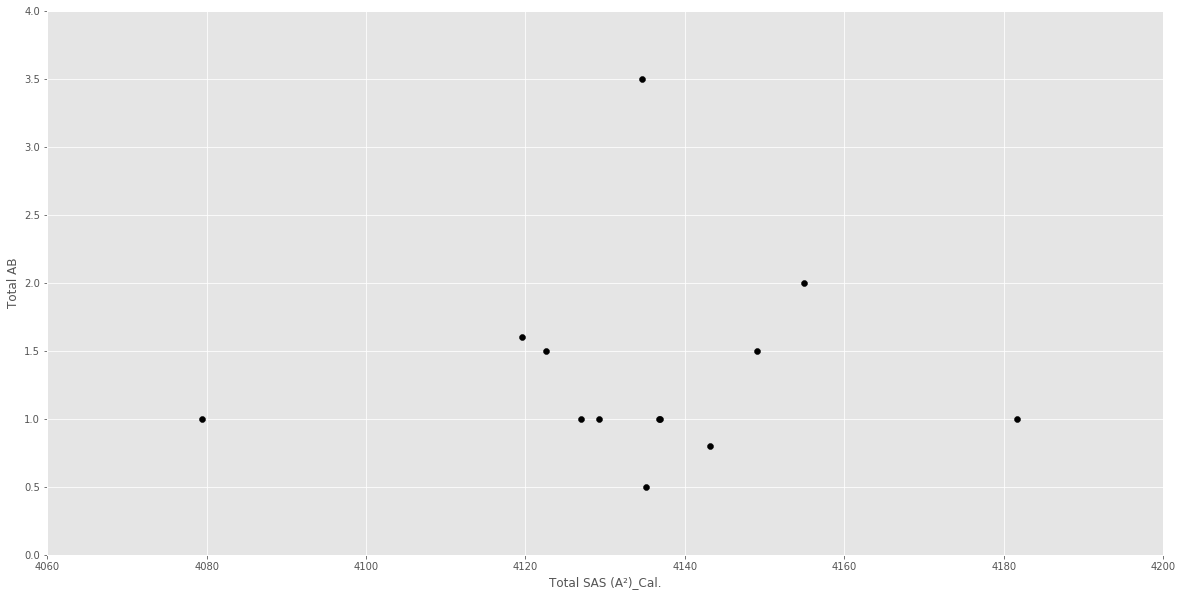

In [48]:
#Figure 11a
_1IYT_total_AB_2 = _1IYT_tot_AB_and_prop[:, 0]
_1IYT_total_SAS_2 = _1IYT_tot_AB_and_prop[:, 1]

# Plot data with smoothed curve
plt.figure(figsize = (20, 10))
plt.scatter(_1IYT_total_SAS_2, _1IYT_total_AB_2, c = 'k')

#Set axis limits
axis = plt.gca()
axis.set_xlim([4060,4200])
axis.set_ylim([0,4])

#Labels
plt.xlabel('Total SAS (A²)_Cal.')
plt.ylabel('Total AB')

Text(0, 0.5, 'Total AB')

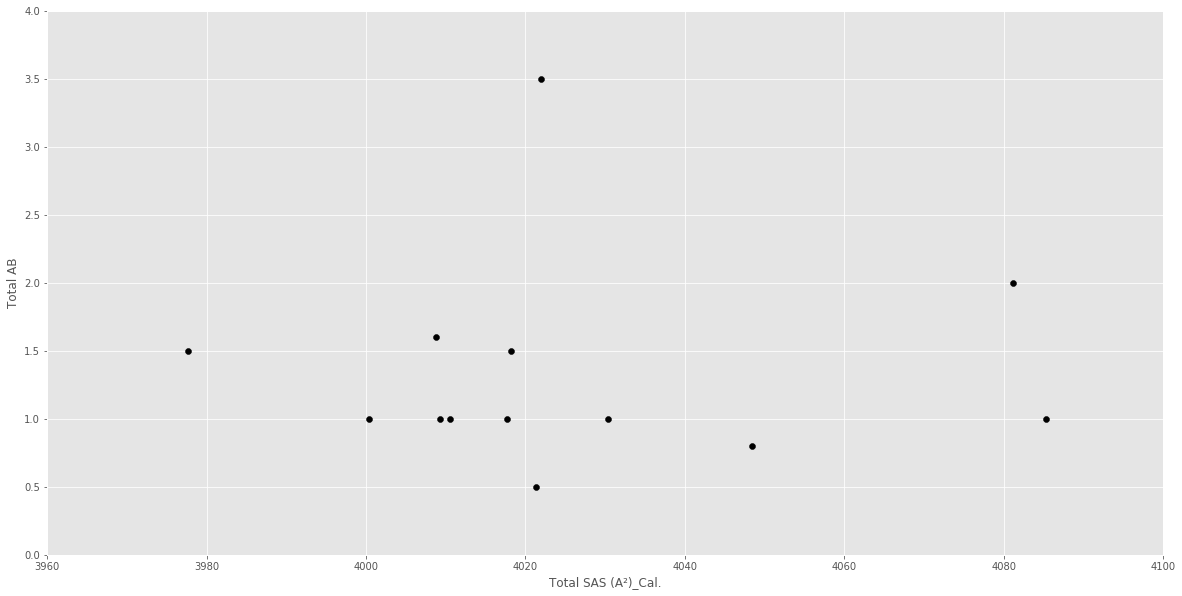

In [49]:
#Figure 11b
_1Z0Q_total_AB_2 = _1Z0Q_tot_AB_and_prop[:, 0]
_1Z0Q_total_SAS_2 = _1Z0Q_tot_AB_and_prop[:, 1]

# Plot data with smoothed curve
plt.figure(figsize = (20, 10))
plt.scatter(_1Z0Q_total_SAS_2, _1Z0Q_total_AB_2, c = 'k')

#Set axis limits
axis = plt.gca()
axis.set_xlim([3960,4100])
axis.set_ylim([0,4])

#Labels
plt.xlabel('Total SAS (A²)_Cal.')
plt.ylabel('Total AB')

Text(0, 0.5, 'Total AB')

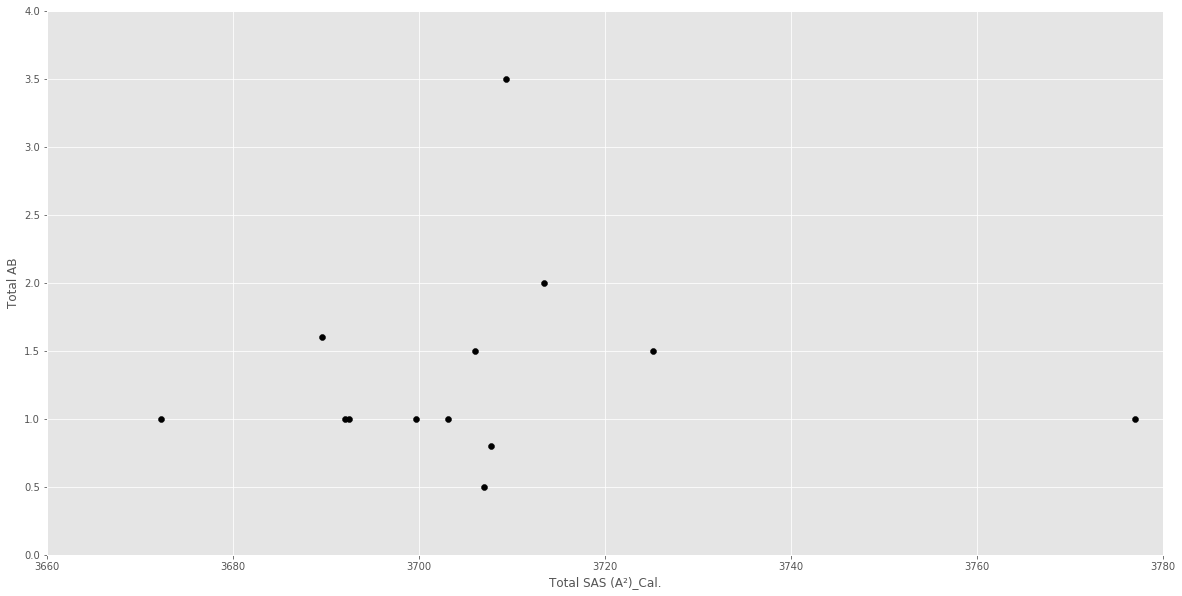

In [50]:
#Figure 11c
_1BA4_total_AB_2 = _1BA4_tot_AB_and_prop[:, 0]
_1BA4_total_SAS_2 = _1BA4_tot_AB_and_prop[:, 1]

# Plot data with smoothed curve
plt.figure(figsize = (20, 10))
plt.scatter(_1BA4_total_SAS_2, _1BA4_total_AB_2, c = 'k')

#Set axis limits
axis = plt.gca()
axis.set_xlim([3660,3780])
axis.set_ylim([0,4])

#Labels
plt.xlabel('Total SAS (A²)_Cal.')
plt.ylabel('Total AB')

Text(0, 0.5, 'Total AB')

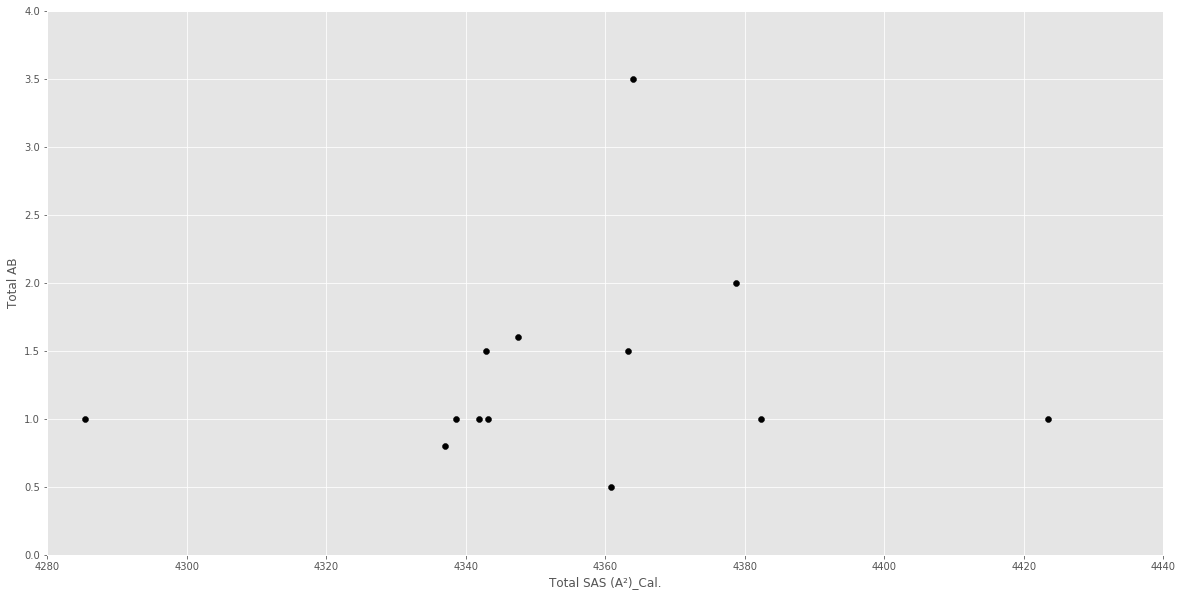

In [51]:
#Figure 11d
_2LFM_total_AB_2 = _2LFM_tot_AB_and_prop[:, 0]
_2LFM_total_SAS_2 = _2LFM_tot_AB_and_prop[:, 1]

# Plot data with smoothed curve
plt.figure(figsize = (20, 10))
plt.scatter(_2LFM_total_SAS_2, _2LFM_total_AB_2, c = 'k')

#Set axis limits
axis = plt.gca()
axis.set_xlim([4280,4440])
axis.set_ylim([0,4])

#Labels
plt.xlabel('Total SAS (A²)_Cal.')
plt.ylabel('Total AB')

Text(0, 0.5, 'Total AB')

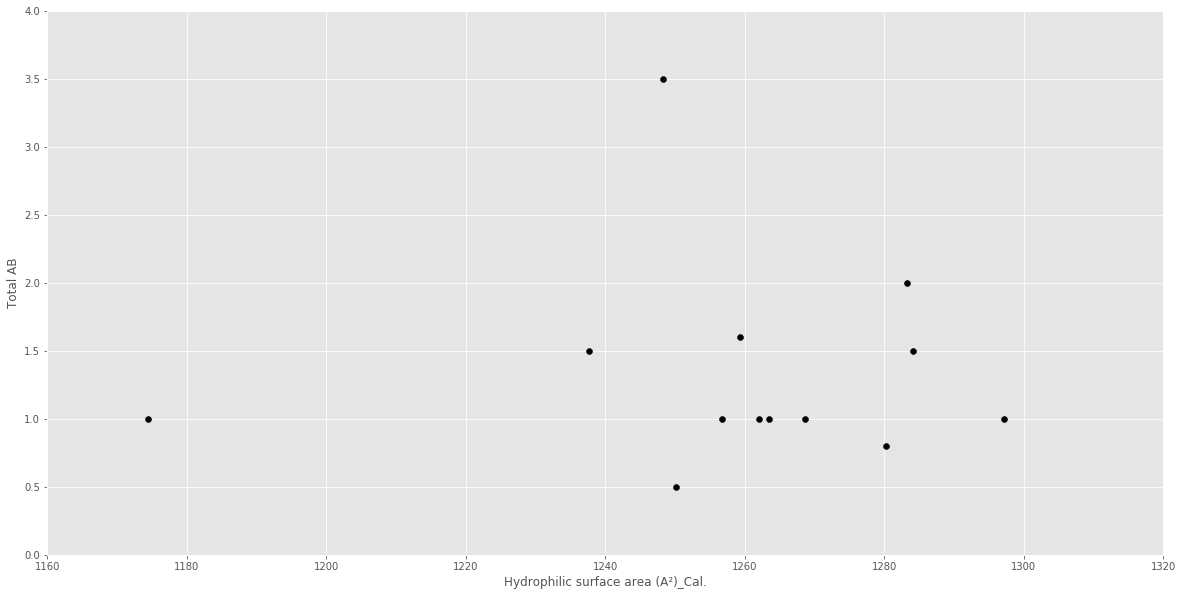

In [52]:
#Figure 12a
_1IYT_total_AB = _1IYT_tot_AB_and_prop[:,0]
_1IYT_hydrophilic_SAS = _1IYT_tot_AB_and_prop[:,3]

# Plot data with smoothed curve
plt.figure(figsize = (20, 10))
plt.scatter(_1IYT_hydrophilic_SAS, _1IYT_total_AB, c = 'k')

#Set axis limits
axis = plt.gca()
axis.set_xlim([1160,1320])
axis.set_ylim([0,4])

#Labels
plt.xlabel('Hydrophilic surface area (A²)_Cal.')
plt.ylabel('Total AB')

Text(0, 0.5, 'Total AB')

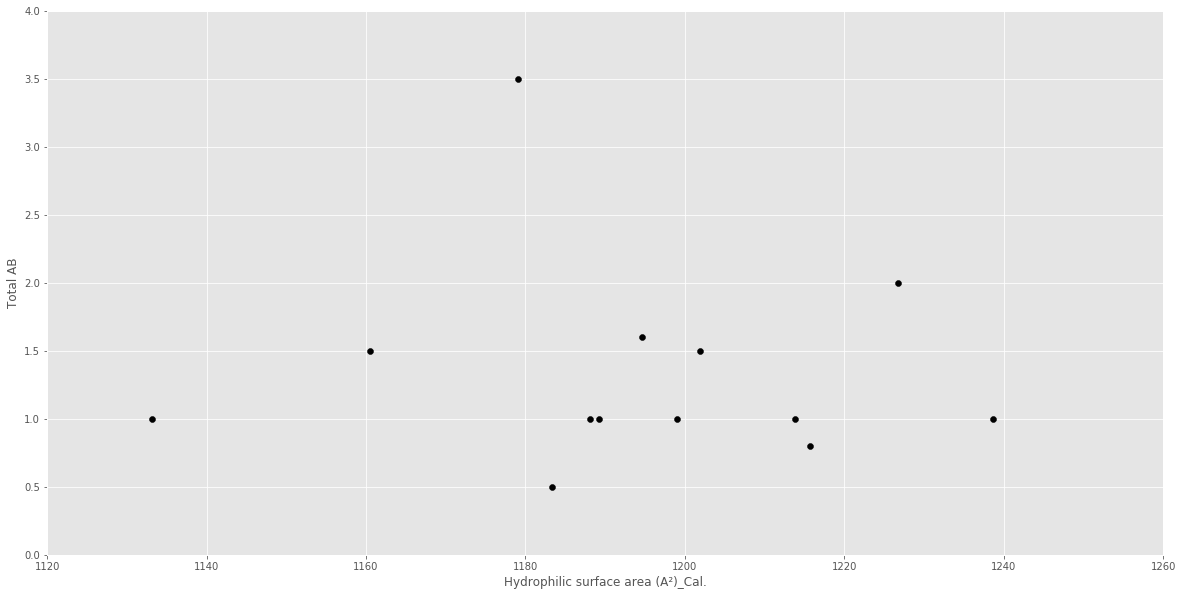

In [53]:
#Figure 12b
_1Z0Q_total_AB = _1Z0Q_tot_AB_and_prop[:,0]
_1Z0Q_hydrophilic_SAS = _1Z0Q_tot_AB_and_prop[:,3]

# Plot data with smoothed curve
plt.figure(figsize = (20, 10))
plt.scatter(_1Z0Q_hydrophilic_SAS, _1Z0Q_total_AB, c = 'k')

#Set axis limits
axis = plt.gca()
axis.set_xlim([1120,1260])
axis.set_ylim([0,4])

#Labels
plt.xlabel('Hydrophilic surface area (A²)_Cal.')
plt.ylabel('Total AB')

Text(0, 0.5, 'Total AB')

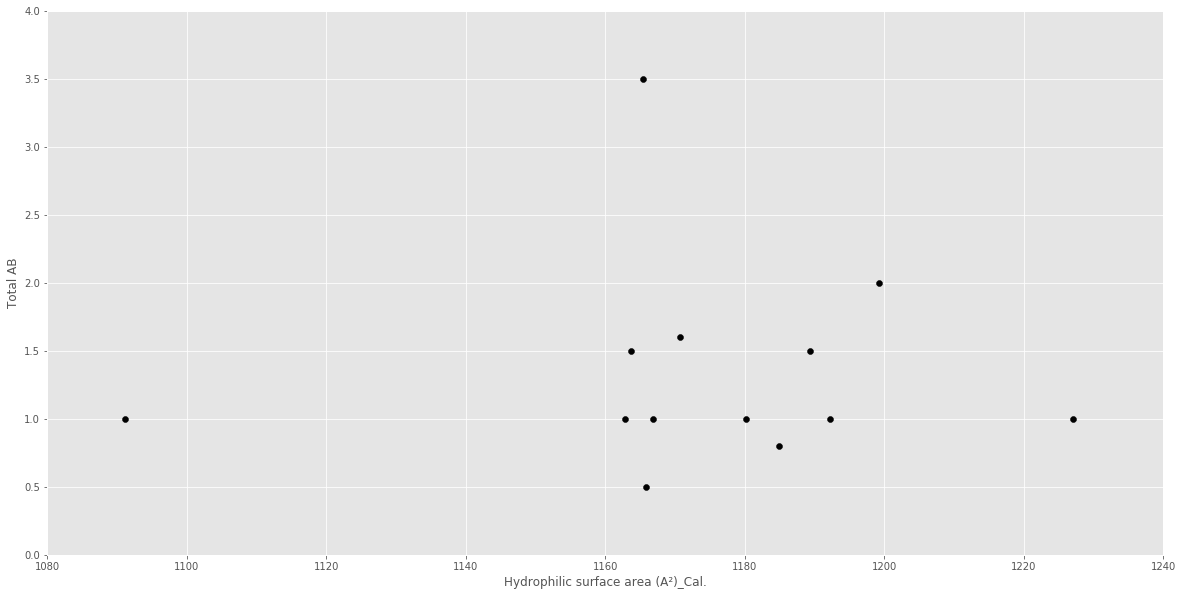

In [54]:
#Figure 12c
_1BA4_total_AB = _1BA4_tot_AB_and_prop[:,0]
_1BA4_hydrophilic_SAS = _1BA4_tot_AB_and_prop[:,3]

# Plot data with smoothed curve
plt.figure(figsize = (20, 10))
plt.scatter(_1BA4_hydrophilic_SAS, _1BA4_total_AB, c = 'k')

#Set axis limits
axis = plt.gca()
axis.set_xlim([1080,1240])
axis.set_ylim([0,4])

#Labels
plt.xlabel('Hydrophilic surface area (A²)_Cal.')
plt.ylabel('Total AB')

Text(0, 0.5, 'Total AB')

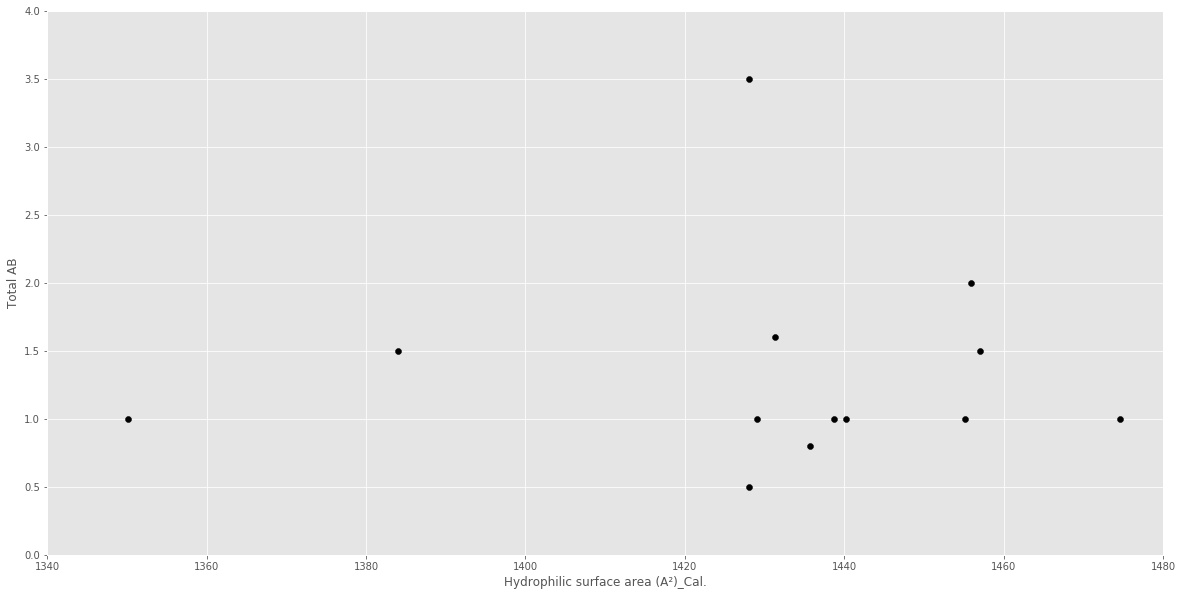

In [55]:
#Figure 12d
_2LFM_total_AB = _2LFM_tot_AB_and_prop[:,0]
_2LFM_hydrophilic_SAS = _2LFM_tot_AB_and_prop[:,3]

# Plot data with smoothed curve
plt.figure(figsize = (20, 10))
plt.scatter(_2LFM_hydrophilic_SAS, _2LFM_total_AB, c = 'k')

#Set axis limits
axis = plt.gca()
axis.set_xlim([1340,1480])
axis.set_ylim([0,4])

#Labels
plt.xlabel('Hydrophilic surface area (A²)_Cal.')
plt.ylabel('Total AB')